<a href="https://colab.research.google.com/github/sergiolitwiniuk85/machineLearning/blob/main/svm_clasification_bagging_stacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Punto 1: Análisis y Depuración de la Base de Datos y Feature Engineering

El primer paso antes de abordar cualquier problema de machine learning es comprender la naturaleza de los datos, el problema que se plantea y preparar los datos de forma acorde al planteo. Esto significa que debemos realizar un análisis descriptivo para identificar patrones, posibles problemas, valores missing y outliers, para llevar a cabo el feature engineering, que consiste en transformar las variables existentes o crear nuevas variables a partir de las originales que nos permitan mejorar el rendimiento de los modelos predictivos.

## Análisis Descriptivo Inicial:

En primer lugar comenzamos cargando la base de datos datos_tarea25.csv utilizando la librería pandas. Nos planteamos como primer paso obtener los siguientes descriptivos utilizando los siguientes métodos:

* Visualización de las primeras filas del DataFrame para entender la estructura de los datos con el metodo **.head()**.

* Obtención de información general sobre el DataFrame, como el tipo de datos de cada columna y la presencia de valores no nulos utilizando el mètodo **.info()**.

* Eliminacion de registros duplicados.

* Cálculo de estadísticos descriptivos para las variables numéricas como media, desviación estándar, cuartiles. para ello utilizaremos el mètodo **.describe()**.

* Análisis de la distribución de las variables categóricas según conteo de valores únicos con **.value_counts()**.

* Variable Objetivo: la variable objetivo debe construirse a partir de la columna 'Color' para predecir si un coche debe pintarse de blanco o no.

* Valores missing, identificacion y caracterizacion.

## Preprocesamiento:

El preprocesamiento y el feature engineering son cruciales para analizar la calidad de los datos. En el mundo real los datos generalmente de forma frecuente se presentan incompletos con ruido e inconsistentes. Las técnicas de preprocesamiento nos ayudan a limpiar y mejorar la calidad de los datos.
En machine learning dependiendo del algoritmo utilizado deberemos asegurarnos de que nuestro set de datos cumpla con los requisitos para cada algoritmo, por ejemplo los àrboles de decisión son capaces de manejar datos missing, en tanto que el algoritmo SVM no puede ser utilizado con valores nulos, admàs las variables categòricas codificadas en el dataset deben recodificarse como valores numèricas para ser soportados por SVM. Es por ello que teniendo en cuanta que utilizaremos en primer lugar SVM debemos tener presente la necesidad de convertir todos los valores a numèricos ya sea utilizando un encoder o convirtiendo los valores a variables dummies, ademàs debemos asegurarnos de no tener valores nulos. Como una condiciòn mas es cierto que la relación de los outliers y el uso de SVM con kerlen lineal tiene menos impacto que en otros modelos como regresión lineal, aunque con la utilizaciòn de un kernel como rbf que usa distancias exponenciales puede distorsionar significativamente el hiperplano de decisión. Finalmente para reforzar el preprocesamiento debemos tener en cuenta que SVM es sensible al escalado de características, sobre todo cuando se recurre a kernels no lineales, por lo que utilizaremos algun scaler como RobustScaler o MinMaxScaler para los valores numèricos.
En principio no crearemos nuevas variables, nos limitaremos a las ya existentes en el dataset. Esta decisión la he tomado debido a que si bien sería posible introducir nuevas variables lo que se persigue con el desarrollo del módulo es la práctica en las herramientas de anállisis de datos en machine learning y no encontrar el mejor modelo para producción, que si podría merecer el esfuerzo en el desarrollo más amplio del espacio de nuevas variables.
Al final de la etapa de preprocesamiento verificaremos la colinealidad entre las variables para interpretar si es necesaria una reducción de la dimensionalidad, ya que puede ser necesario reducir la cantidad de variables, lo que podrìa mejorar la eficiencia computacional y prevenir el sobreajuste.

### Datos de entrada:

El archivo datos_tarea25  contiene informaciòn de miles de vehìculos, su color y datos relacionados como tamaño del motor, numero de cilindros, kilometraje, etc.

En primer lugar importamos las librerias que utilizaremos mas adelante y cargaremos los datos del **datos_tarea25.xlsx** en un DataFrame llamado **df**.

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.feature_selection import SelectKBest, chi2, RFE, mutual_info_classif, f_classif
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, RocCurveDisplay

from sklearn.model_selection import KFold, ShuffleSplit, LeaveOneOut, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
!pip install openpyxl & pip install missingno

## 1. Introducción (1 página)

  **Problema:**
  

  Una empresa dedicada a la venta de coches usados debe determinar el color óptimo para repintar vehículos que llegan en condiciones deficientes.
  Tras evaluar las opciones, decide limitarse a los colores blanco y negro, La base de datos disponible incluye las siguientes variables independientes Precio de venta, Cantidad de Impuestos a pagar, Fabricante, Año de fabricación, Categoría, Interior de cuero, Tipo de combustible, Volumen del motor, Kilometraje, Cilindros, Tipo de caja de cambios, Ruedas motrices, Lugar del volante, Número de Airbags Y de la variable dependiente Color. La decisión final es si el coche debe pintarse de blanco o no.
  
  **Objetivo del análisis:**

  El objetivo es desarrollar un modelo predictivo que, basándose en las características de los vehículos en el mercado de segunda mano, determine el color optimo a repintar (blanco o negro).


In [ ]:
!pwd

/content


# 3. Análisis Exploratorio y Feature Engineering (4-5 páginas)

**Descripción del Dataset:**

* Visualización de las primeras filas del DataFrame para entender la estructura de los datos con el metodo **.head()**.


In [ ]:
import pandas as pd

df = pd.read_excel('datos_tarea25.xlsx')  # Usar read_excel

# Muestro información básica del dataset
print("="*80)
print("HEAD DEL DATASET")
print("="*80)
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}\n")
print(df.head())
print("\n"*2)
print("="*80)
print("INFORMACIÓN BÁSICA DEL DATASET dtypes")
print("="*80)
print(df.info())


HEAD DEL DATASET
Filas: 4340, Columnas: 15

   Price  Levy   Manufacturer  Prod. year   Category Leather interior  \
0  39493   891        HYUNDAI        2016       Jeep              Yes   
1   1803   761         TOYOTA        2010  Hatchback              Yes   
2   1098   394         TOYOTA        2014      Sedan              Yes   
3    941  1053  MERCEDES-BENZ        2014      Sedan              Yes   
4   1019  1055          LEXUS        2013       Jeep              Yes   

  Fuel type Engine volume    Mileage  Cylinders Gear box type Drive wheels  \
0    Diesel             2  160931 km          4     Automatic        Front   
1    Hybrid           1.8  258909 km          4     Automatic        Front   
2    Hybrid           2.5  398069 km          4     Automatic        Front   
3    Diesel           3.5  184467 km          6     Automatic         Rear   
4    Hybrid           3.5  138038 km          6     Automatic        Front   

        Wheel  Color  Airbags  
0  Left wheel  W

En primer lugar elimino las filas duplicadas del dataset. Esto ademas de ser una practica habitual para evitar introducir sesgos en el entrenamiento de la SVM, evita costos computacionales y tambien evita inestabilidades en los calculos de los kernels, por lo que procedemos a ver de forma simple como se distribuyen los duplicados y luego a removerlos por comppleto.

Registros, Columnas
(4340, 15)


<Axes: xlabel='None', ylabel='count'>

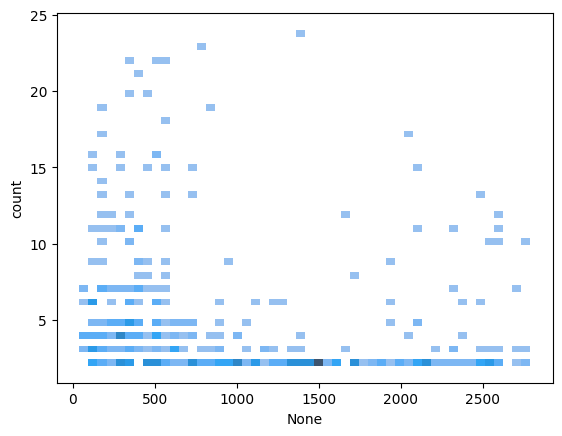

In [ ]:
print("Registros, Columnas")
print(df.shape)

# conteo de duplicados por grupo
dup_counts = df.groupby(df.columns.tolist()).size().reset_index(name='count')
dup_counts = dup_counts[dup_counts['count'] > 1]  # filtro solo duplicados

sns.histplot(data=dup_counts, x=dup_counts.index, y=dup_counts['count'],kde=True, bins=50)


In [ ]:
dup_counts = df.groupby(df.columns.tolist()).size().reset_index(name='count')
dup_counts = dup_counts[dup_counts['count'] > 1]  # filtro solo duplicados
ndups = len(dup_counts)
print("="*80)
print(f"Grupos duplicados: {ndups}")
print("="*80)

Grupos duplicados: 396


In [ ]:
df.drop_duplicates(inplace=True)
print("="*80)
print("LUEGO DE FILTRAR:")
print("="*80)
print("(Filas, Columnas)")
print(df.shape)


LUEGO DE FILTRAR:
(Filas, Columnas)
(2806, 15)


Luego de quitar los duplicados de nuestro DataFrame ahora tenemos 2806 registros. Procedemos a chequear que tan balanceados estan los datos en la variable objetivo, por si es necesario introducir alguna tecnica para evitar el desbalance de la variable target.

In [ ]:
df.groupby('Color').size()

,0
Color,
Black,1438
White,1368


Las proporciones de datos en la variable objetivo se encuentran equilibradas, por lo que no hace falta hacer algun ajuste para balancear la variable targeet, por lo que proseguimos con la preparacion del dataset.

### Realizamos un describe para interpretar mejor el dataset:

* Cálculo de estadísticos descriptivos para las variables numéricas como media, desviación estándar, cuartiles. para ello utilizaremos el mètodo **.describe()**.


In [ ]:
df.describe(include='all')

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
count,2806.000000,2806,2806,2806.000000,2806,2806,2806,2806,2806,2806.000000,2806,2806,2806,2806,2806.000000
unique,NaN,203,4,NaN,3,2,3,58,1826,NaN,2,3,2,2,NaN
top,NaN,-,HYUNDAI,NaN,Sedan,Yes,Petrol,2,0 km,NaN,Automatic,Front,Left wheel,Black,NaN
freq,NaN,634,1038,NaN,1478,2259,1558,558,77,NaN,2168,2010,2710,1438,NaN
mean,23913.585531,NaN,NaN,2012.811475,NaN,NaN,NaN,NaN,NaN,4.646472,NaN,NaN,NaN,NaN,7.536707
std,26028.717701,NaN,NaN,3.926385,NaN,NaN,NaN,NaN,NaN,1.281613,NaN,NaN,NaN,NaN,4.208459
min,3.000000,NaN,NaN,1943.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000
25%,9408.000000,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,4.000000
50%,18821.500000,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,8.000000
75%,31361.000000,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,12.000000


Podemos ver que las variable Levy, como EngineVolume y Mileage se tendran que convertir a numericas para poder ser evaluadas.

Realizamos en primer lugar la conversion de tipos sobre las variables numericas que fueron leidas como object. Ademas una inspeccion sobre el dataset para identificar valores nulos, los cuales deben ser manejados propiamente.

In [ ]:
# Convertir ambas columnas a tipo string primero
df['Engine volume'] = df['Engine volume'].astype(str)
df['Levy'] = df['Levy'].astype(str)

# 1. Procesamiento de 'Engine volume' (Turbo y valor numérico)
df['Turbo'] = df['Engine volume'].str.contains('Turbo', case=True).astype(int)
df['Engine volume'] = (
    df['Engine volume']
    .str.replace('Turbo', '', case=False)
    .str.strip()
    .replace('', np.nan)
    .astype(float)
)

# 2. Procesamiento de 'Levy' (manejo de valores no numéricos como '-')
df['Levy'] = (
    df['Levy']
    .replace('-', np.nan)  # Reemplazar '-' con NaN
    .astype(float)         # Convertir a float
)

# Convertimos Mileage a valor numerico.
df['Mileage'] = (
    df['Mileage']
    .str.replace(' km', '', regex=False)
    .str.replace(' ', '', regex=False)
    .astype(int)
)


In [ ]:
# Verificación
print(df.head())
print(df.info())
print(df.describe(include='all'))



   Price    Levy   Manufacturer  Prod. year   Category Leather interior  \
0  39493   891.0        HYUNDAI        2016       Jeep              Yes   
1   1803   761.0         TOYOTA        2010  Hatchback              Yes   
2   1098   394.0         TOYOTA        2014      Sedan              Yes   
3    941  1053.0  MERCEDES-BENZ        2014      Sedan              Yes   
4   1019  1055.0          LEXUS        2013       Jeep              Yes   

  Fuel type  Engine volume  Mileage  Cylinders Gear box type Drive wheels  \
0    Diesel            2.0   160931          4     Automatic        Front   
1    Hybrid            1.8   258909          4     Automatic        Front   
2    Hybrid            2.5   398069          4     Automatic        Front   
3    Diesel            3.5   184467          6     Automatic         Rear   
4    Hybrid            3.5   138038          6     Automatic        Front   

        Wheel  Color  Airbags  Turbo  
0  Left wheel  White        4      0  
1  Left 

En primer lugar vemos valores extremos en la variable precio "Price" con una gran variabilidad y un amplio rango, por lo que debera ser escalada utilizando técnicas como el RobustScaler, que es menos sensible a los outliers.

El impuesto "Levy" presenta tanto valores faltantes como outliers significativos, podria ser imputado utilizando para ello la mediana o un KNNImputer y transformado usando un escalado logarítmico o el RobustScaler.

El volumen del motor "Engine Volume" presenta valores imposibles, como lo son el cero "0"  que deberan ser eliminados.

Respecto a las variables categóricas, la distribución de fabricantes las codificaremos de forma ordinal utilizando OneHotEncoding. Como tambien lo haremos con la variable "Fuel type" Eléctrico < Gasolina < Diésel, ya que conveniente utilizar una codificación ordinal que preserve esta jerarquía y facilite su interpretación por parte del modelo.

En el caso del kilometraje ("Mileage"), donde se observa un valor de más de mil millones de kilómetros, es imprescindible establecer un limite para los registros imposibles, estableciendo un umbral razonable maximo, como 500 mil kilómetros.

Asimismo, para el año de producción ("Prod. year"), intentarè crear categorías agrupadas por lustros (5 años) para reducir la dispersión y mejorar la capacidad del modelo de generalizar patrones temporales de forma más eficiente.


A continuaciòn definimos algunos criterios lògicos para filtrar los valores numéricos del conjunto de datos inicial:, como lo son quitar los autos que tienen kilometraje 0 km, en realidad he considerado que un auto usado tiene al menos 500km de uso, o también filtrar los que presentan mas de 400mil kilometros, o por ejemplo valores de volumen de motor con valor 0, no sabemos con certeza porque estos datos estarían incluidos en el conjunto de datos, aunque estimo sin tener acceso al cliente que esos valores no se condicen con los intereses de una empresa que vende autos usados, es por eso que tengo esos criterios en cuenta para tomar esas decisiones.

Además vemos que el feature precio tiene un valor muy amplio, igual que el kilometraje, por lo tanto tendran que ser escalados utilizando algun escalador suministrado por sklearn como MinMaxScaler o RobustScaler.

* Price (Precio)

  Rango muy amplio: 3a3a627,220

  Desviación estándar alta: 23,990

* Levy (Impuesto)

  Rango: 87 a 11,714

  Desviación estándar: 505.68

* Mileage (Kilometraje)

  Rango extremo: 0 a 1,111,111,109 km (necesita limpieza previa)

  Desviación estándar enorme: 2.097e+07

* Engine volume (Volumen del motor)
f
  Rango: 0 (imposible a menos que fuesen electricos) hasta 6.3 litros

  Vemos que los vehiculos cuyo valor en engine volume es cero pertenecen a categorias de combustible derivado del petroleo o hibridos, por lo que esos datos son erroneos, tenemos que analizar nuevamente que hacemos con esos valores cero, o si tiene sentido imputarlos, o si directamente los eliminamos del dataset para crear nuestro modelo.

  En tanto las variables categóricas Manufacturer, Category, Fuel Type, Gear box Type, DriveWheels, Wheel, Color presentan valores cualitativos que pueden ser manejados con una conversiòn tanto con labelencoder como con onehotencoder.
  En mi caso prefiero la utilizacion de labelencoder para la feature Manufacturer y category, ya que pretendo generar una transformación que tome en cuenta el producto del valor del encoding de la marca y la categoria para relacionar con otras variables para obtener alguna nueva caracteristica que me permita obtener un modelo con un mayor accuracy.
  

A continuación vemos las variables categoricas se distribuyen con respecto a la variable objetivo, lo que nos puede dar un panorama de cuales son las variables mas informativas:


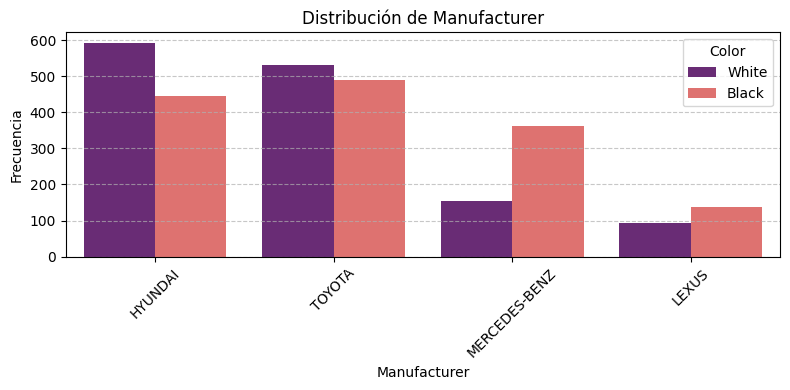

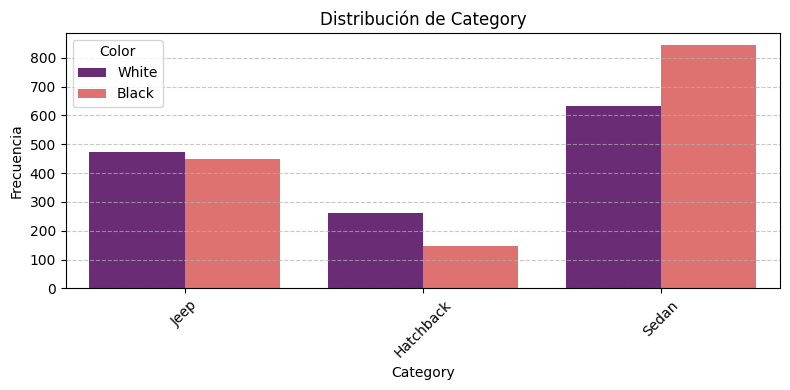

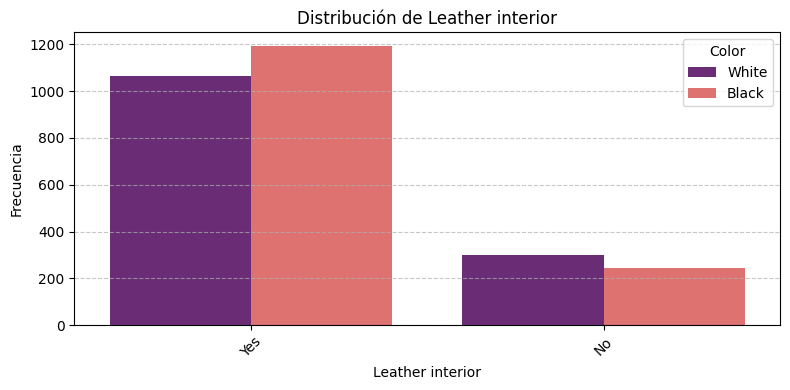

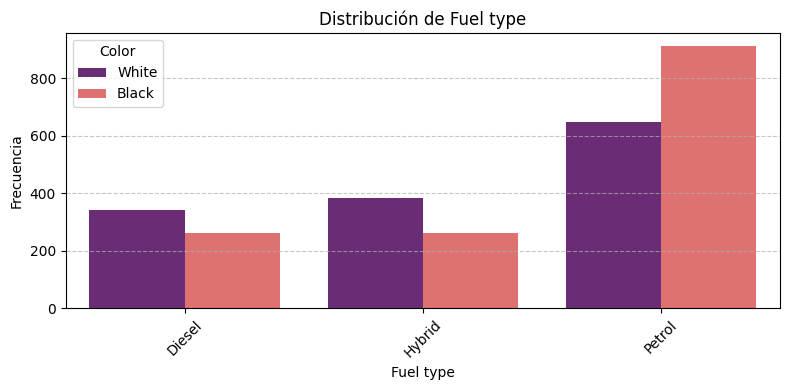

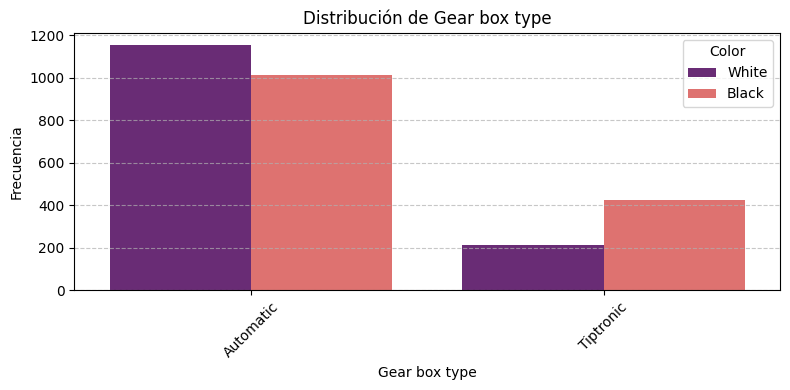

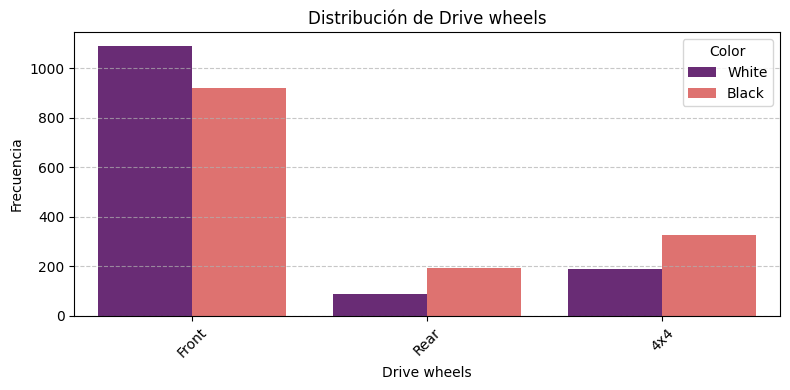

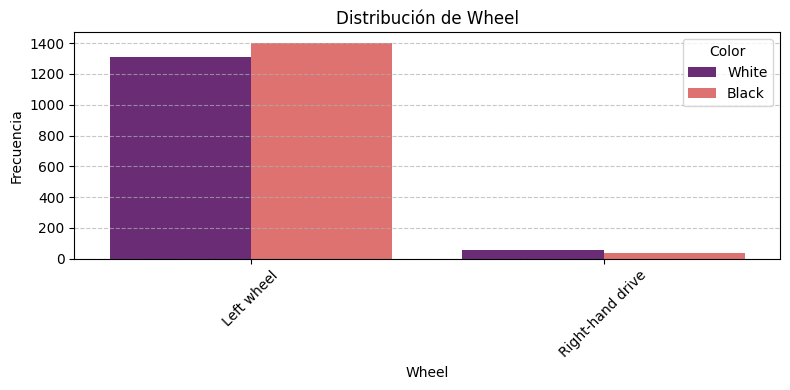

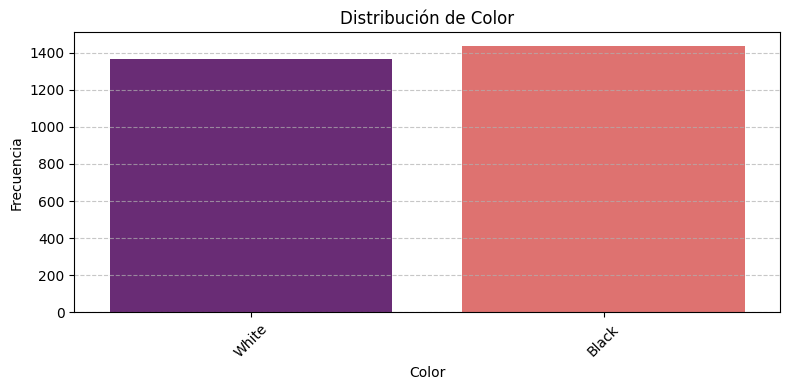

In [ ]:

# Loop over only categorical columns
for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(8, 4))

    sns.countplot(data=df, x=col, hue="Color", palette='magma')

    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

A partir del grafico podemos observar como se distribuye la variable objetivo dentro de cada categoria, por lo que podemos interpretar cual es serian mejores varibles predictivas,vemos que la variable ¨Wheel¨ a priori tiene una cantidad similar de autos blancos o negros en cada uno de sus estados. Por lo tanto esa variable no sería una buena predictora, por lo que podriamos prescindir de ella, aunque lo mejor es evaluar mas adelante si defrinitivamente realizamos un drop de esa variable, las demás variables si bien no son excelentes predictoras tienen una diferencia que se puede apreciar, por lo que las conservaremos a posteriori para continuar con el anàlisis.

<ipython-input-49-9906a12c1675>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Color", y=col, palette='magma')


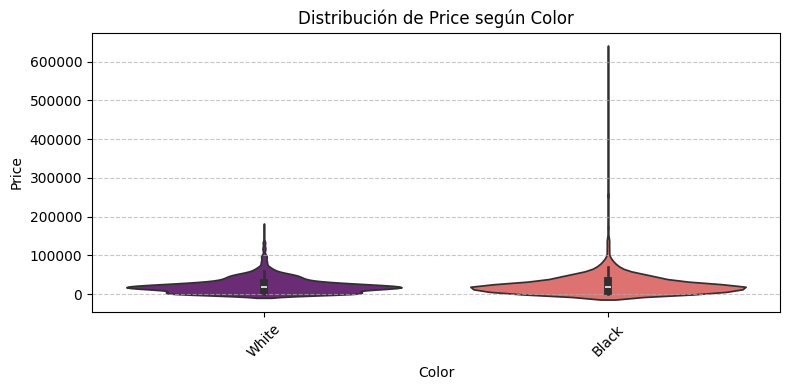

<ipython-input-49-9906a12c1675>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Color", y=col, palette='magma')


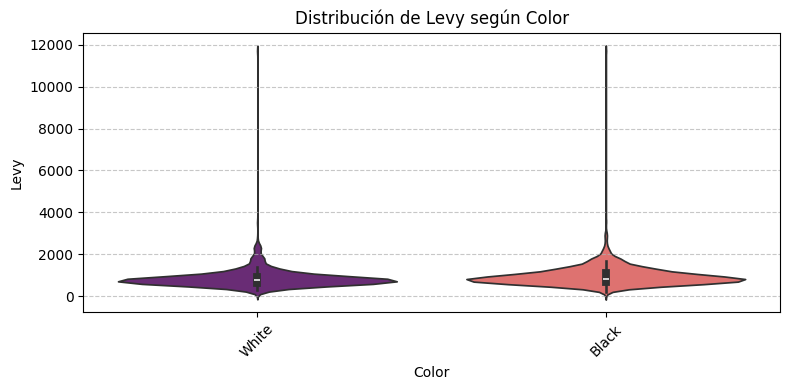

<ipython-input-49-9906a12c1675>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Color", y=col, palette='magma')


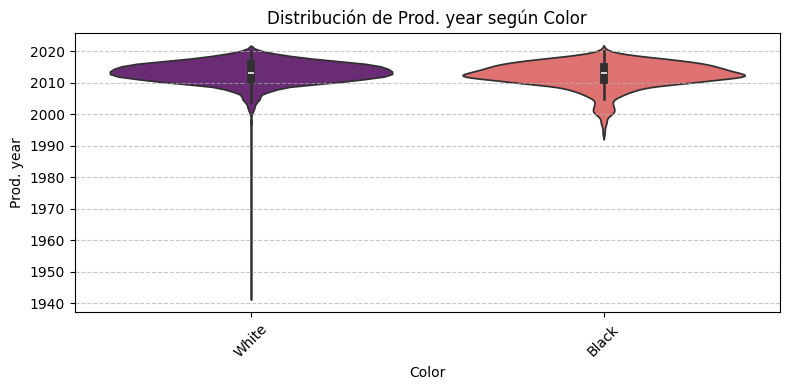

<ipython-input-49-9906a12c1675>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Color", y=col, palette='magma')


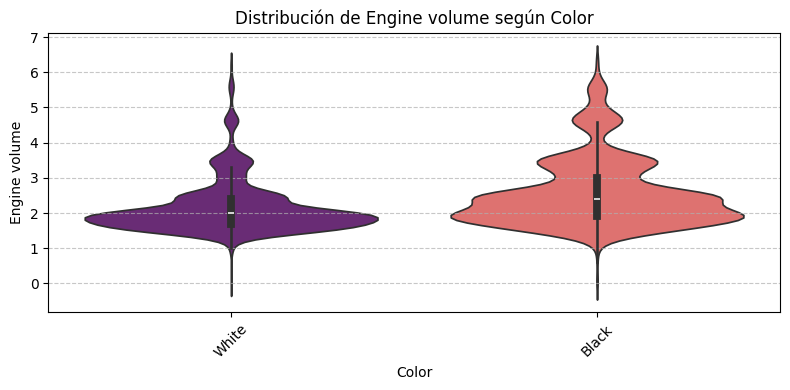

<ipython-input-49-9906a12c1675>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Color", y=col, palette='magma')


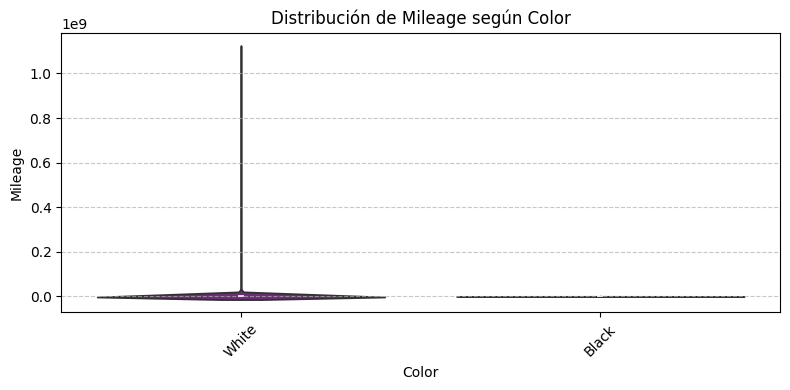

<ipython-input-49-9906a12c1675>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Color", y=col, palette='magma')


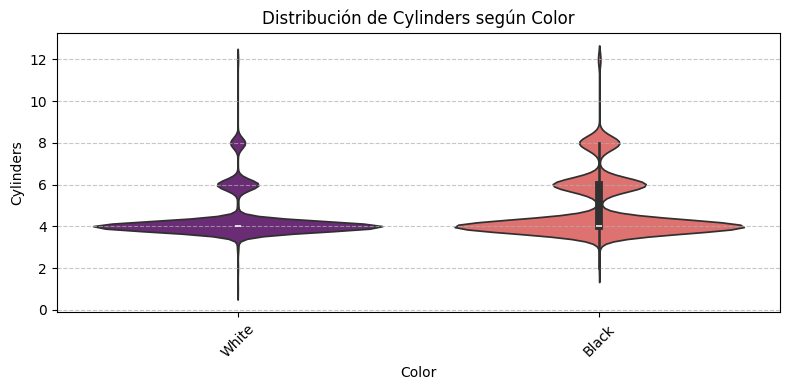

<ipython-input-49-9906a12c1675>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Color", y=col, palette='magma')


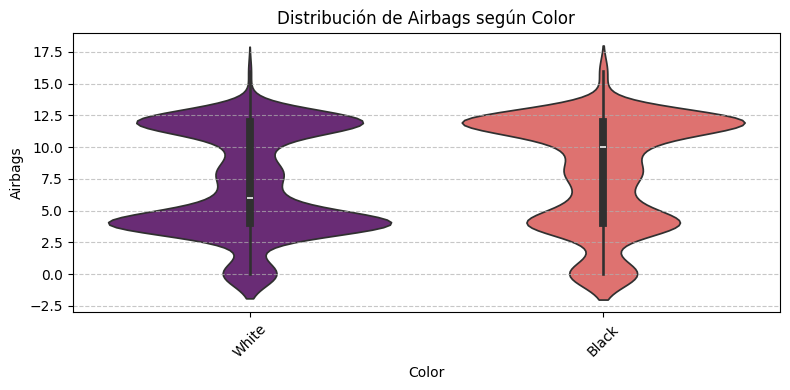

<ipython-input-49-9906a12c1675>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Color", y=col, palette='magma')


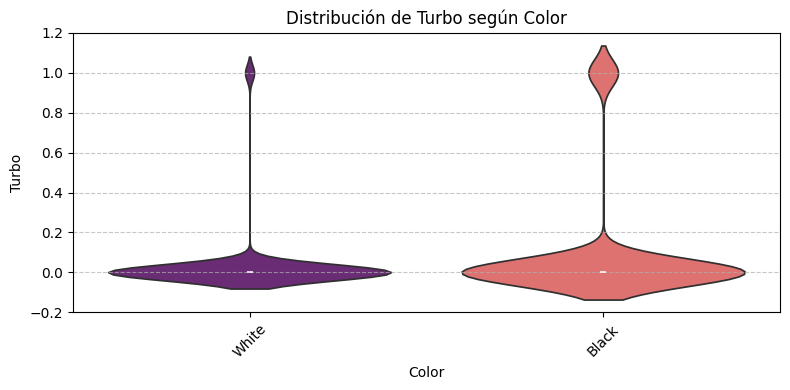

In [ ]:
# Loop over numerical columns
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 4))

    sns.violinplot(data=df, x="Color", y=col, palette='magma')

    plt.title(f'Distribución de {col} según Color')
    plt.xlabel('Color')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

<ipython-input-57-54d5dca80ab9>:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Color')  # La leyenda se genera automáticamente con la paleta
<ipython-input-57-54d5dca80ab9>:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Color')  # La leyenda se genera automáticamente con la paleta
<ipython-input-57-54d5dca80ab9>:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Color')  # La leyenda se genera automáticamente con la paleta
<ipython-input-57-54d5dca80ab9>:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start wit

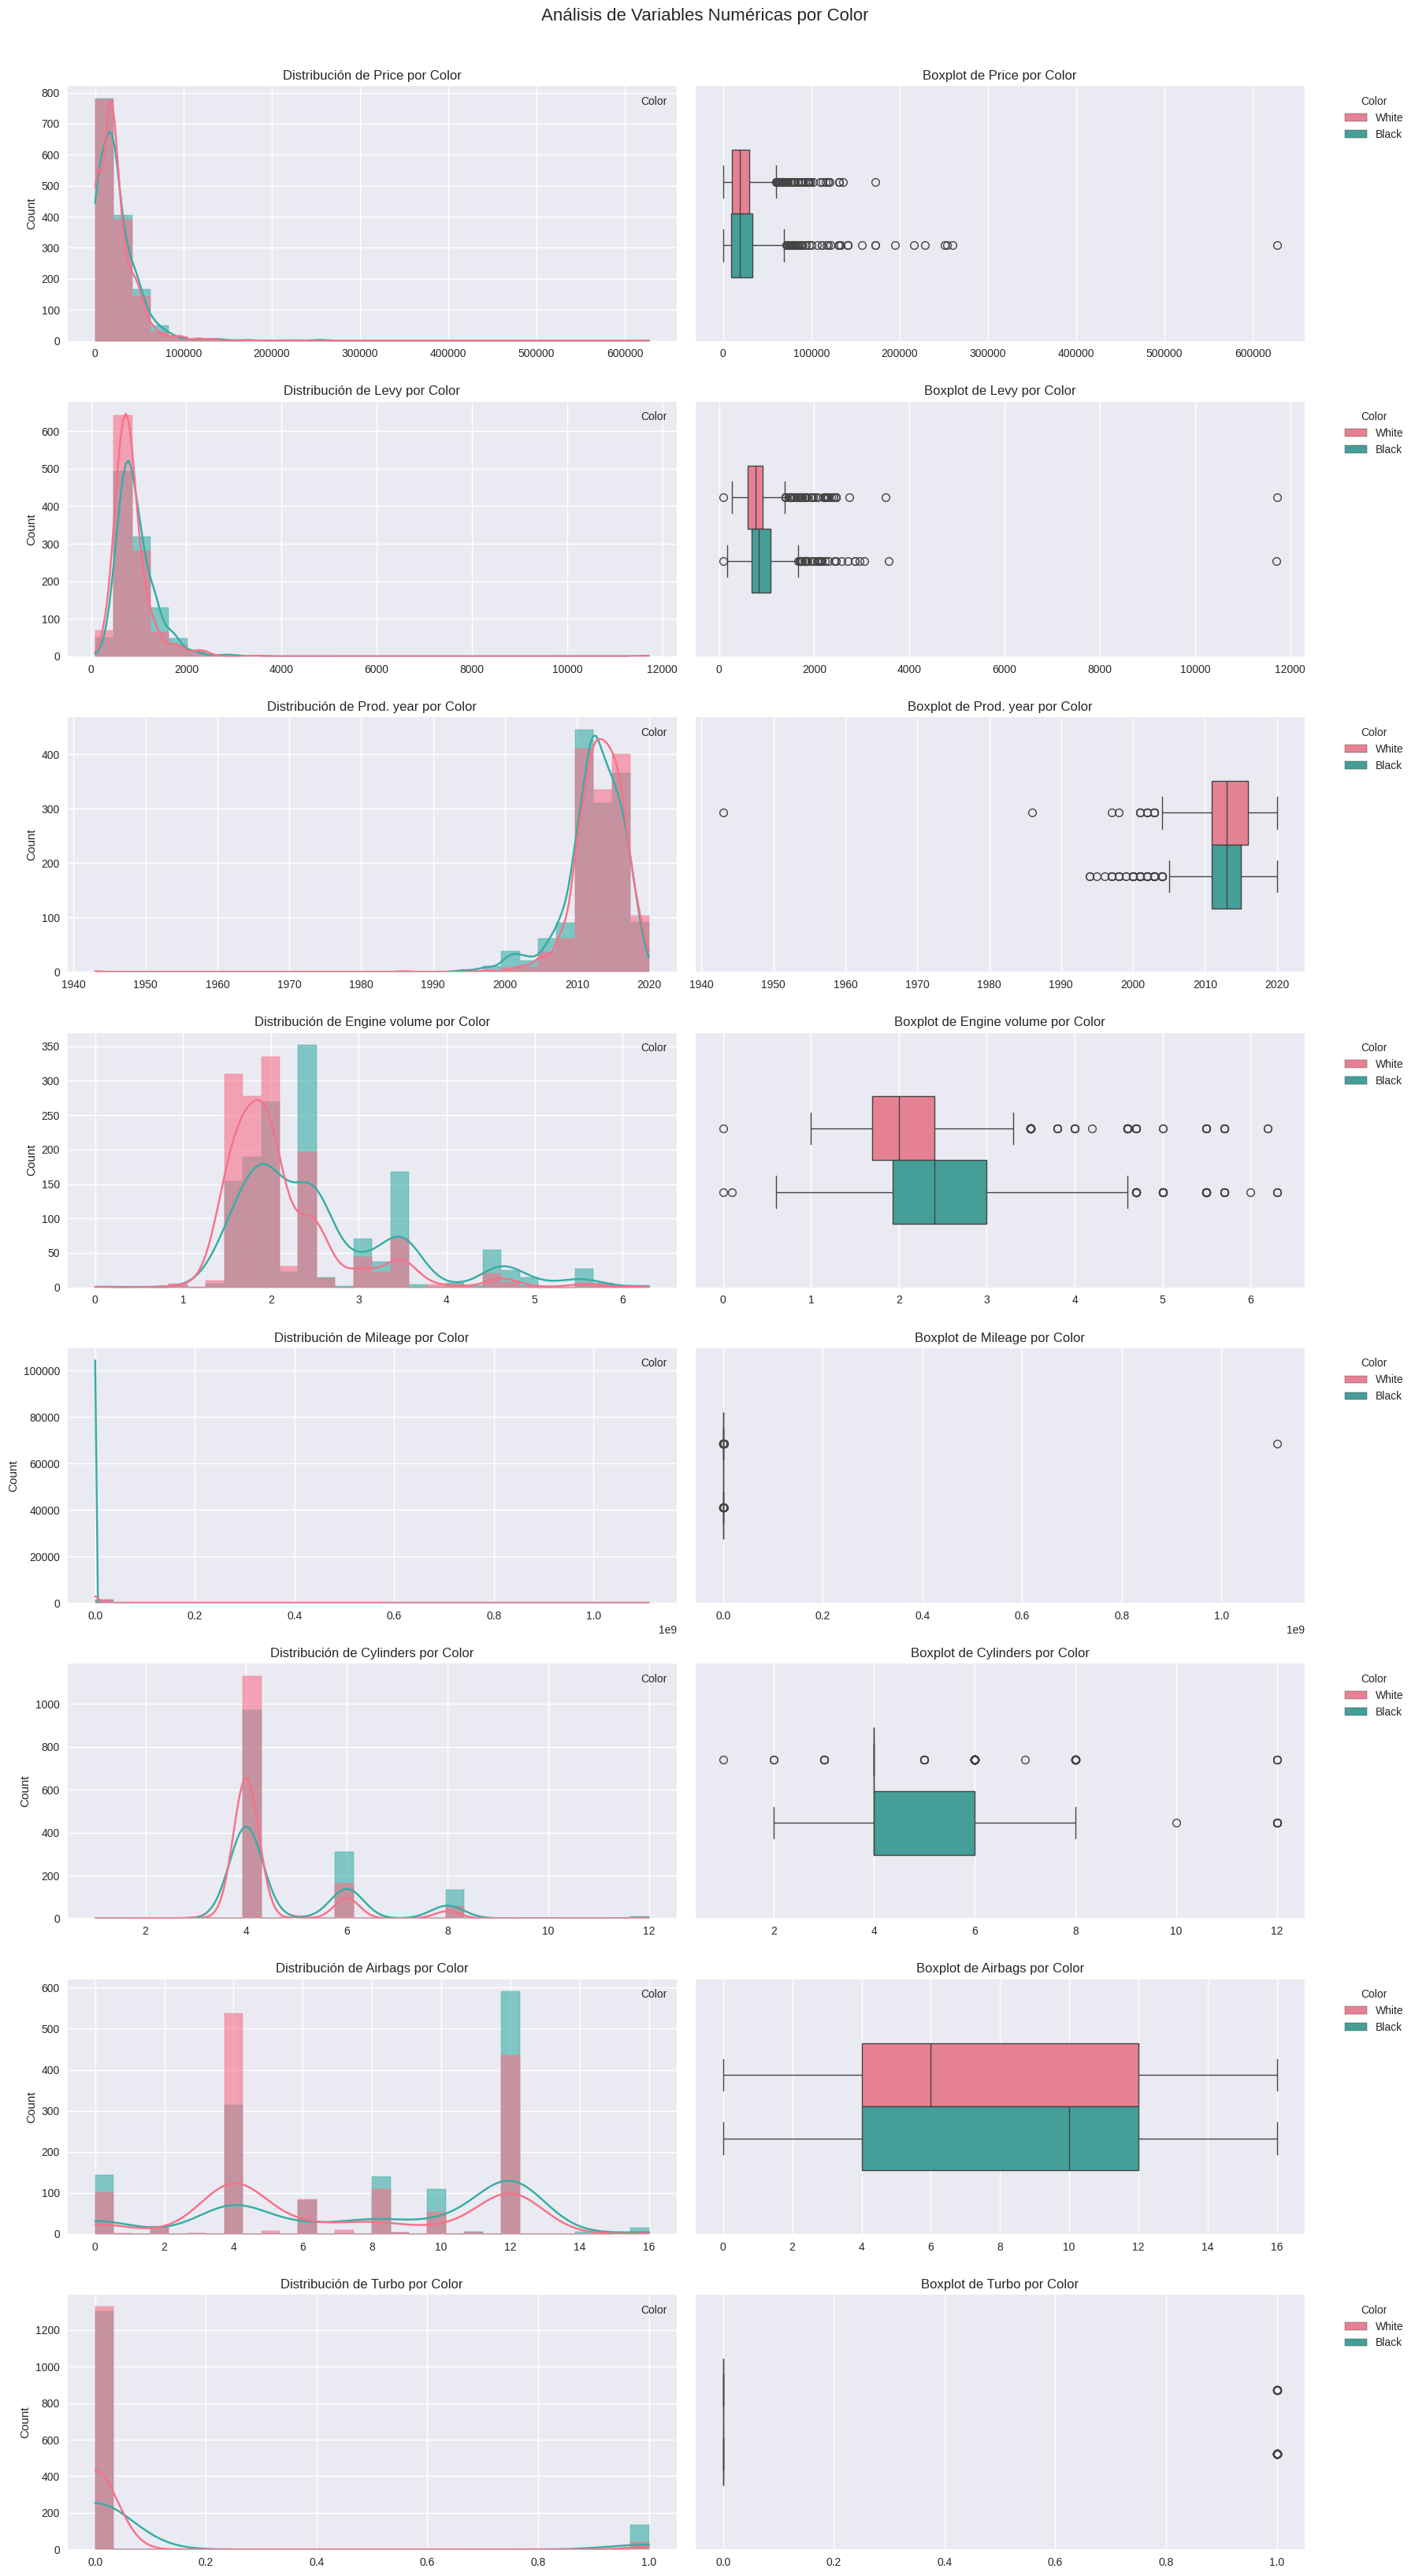

In [ ]:
# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Seleccionar variables numéricas
numeric_vars = df.select_dtypes(include=['int64', 'float64']).columns

# Obtener los valores únicos de la columna 'Color' para crear una paleta dinámica
unique_colors = df['Color'].unique()
color_palette = {}
# Puedes definir una paleta personalizada basada en los colores reales
# Aquí asignamos colores por defecto de seaborn, pero puedes personalizarlos
for i, color in enumerate(unique_colors):
    color_palette[color] = sns.color_palette("husl", n_colors=len(unique_colors))[i]

# Crear gráficos combinados con hue
plt.figure(figsize=(18, len(numeric_vars) * 4))

for i, var in enumerate(numeric_vars, 1):
    # Gráfico de distribución con hue
    plt.subplot(len(numeric_vars), 2, 2 * i - 1)
    sns.histplot(data=df,
                 x=var,
                 hue='Color',
                 kde=True,
                 bins=30,
                 palette=color_palette,  # Usar la paleta dinámica
                 alpha=0.6,
                 element='step')
    plt.title(f'Distribución de {var} por Color', fontsize=12)
    plt.xlabel('')
    plt.legend(title='Color')  # La leyenda se genera automáticamente con la paleta

    # Boxplot con hue
    plt.subplot(len(numeric_vars), 2, 2 * i)
    sns.boxplot(data=df,
                x=var,
                hue='Color',
                palette=color_palette,  # Usar la paleta dinámica
                width=0.5)
    plt.title(f'Boxplot de {var} por Color', fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
    # Mover la leyenda fuera del gráfico
    plt.legend(title='Color', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.suptitle('Análisis de Variables Numéricas por Color', y=1.02, fontsize=16)  # Corregir el título principal
plt.show()


A simple vista se puede apreciar como las variables Engine volume y Cylinder tendrìan la mejor capactidad predictiva si tenemos en cuenta el objetivo del problema que es identificar el color a partir del resto de las variables.

Como vemos hay varios registros que presentan kilometraje cero, lo ideal seria poder entender la naturaleza de estos valores para poder interpretar el dataset, pero como no tenemos acceso a información detallada del porqué esa caracteristica presenta valores cero o valores excesivamente altos es que tenemos que tomar una decisión preliminar para seguir adelante con el procesamiento de los datos.

Por lo que en nuestro caso realizaremos la eliminacion de todos los registros que presenten un valor para mileage fuera del rango de 100 a 500mil millas.

Tambien podemos observar que existen registros con un volumen de motor y numero de cilindros que estan fuera de todo orden. como un tamaño de motor mas pequeño que 0.8, o un numero de cilindros menor a 3. Por lo que para esas instancias de registros he preferido eliminarlas y no introducir errores de partida en el conjunto de datos.

In [ ]:
engine_erroneo = df.loc[(df['Engine volume'] < 0.8) | (df['Cylinders'] < 3)]
engine_erroneo

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo
112,9,NaN,TOYOTA,2005,Sedan,No,Hybrid,1.6,18000,1,Automatic,4x4,Left wheel,White,5,0
119,21953,NaN,HYUNDAI,2013,Sedan,No,Hybrid,2.4,20000,2,Tiptronic,Front,Right-hand drive,Black,4,1
1015,4704,NaN,MERCEDES-BENZ,1999,Sedan,No,Petrol,0.6,142000,4,Tiptronic,Rear,Left wheel,Black,2,1
2227,35,NaN,TOYOTA,2010,Sedan,No,Petrol,1.6,240000,2,Automatic,Front,Left wheel,White,2,0
2437,8624,175.0,TOYOTA,2011,Hatchback,No,Petrol,0.1,0,3,Automatic,Front,Right-hand drive,Black,2,0
2783,60,NaN,TOYOTA,2009,Sedan,No,Hybrid,1.5,1000000,2,Automatic,Front,Left wheel,White,2,0
2948,6,87.0,MERCEDES-BENZ,2016,Sedan,Yes,Petrol,0.0,33600,6,Automatic,Rear,Left wheel,White,12,0
3614,18100,NaN,TOYOTA,2012,Hatchback,No,Hybrid,1.8,115000,2,Automatic,Front,Left wheel,Black,6,0
3928,78,87.0,MERCEDES-BENZ,2014,Sedan,Yes,Petrol,0.0,92800,8,Automatic,Rear,Left wheel,Black,12,0


Establecemos los limites de kilometrajes aceptados, y filtramos los registros que esten fuera del rango aceptado de ´Engine volume'y 'Cylinders´.

In [ ]:
# Definir límites realistas, recodrmos que son vahiculos usados.
km_min = 300  # Mín 500 millas
km_max = 500000  # Máx 500,000 millas

# Crear máscara de valores válidos
km_valido = (df['Mileage'] >= km_min) & (df['Mileage'] <= km_max)
engine_valido = (df['Engine volume'] > 0.8) | (df['Cylinders'] >= 3 | (df['Cylinders'] == 7))

# Aplicar máscaras
df_filtrado = df[km_valido & engine_valido].copy()

# Porcentaje de datos que se conservarán
print(f"Porcentaje de datos dentro de límites: {km_valido.mean()*100:.2f}%")

print(f"Registros después de limpieza: {len(df_filtrado)}")

df_filtrado.describe(include="all")

Porcentaje de datos dentro de límites: 96.61%
Registros después de limpieza: 2711


,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo
count,2711.000000,2113.000000,2711,2711.000000,2711,2711,2711,2711.000000,2711.000000,2711.000000,2711,2711,2711,2711,2711.000000,2711.000000
unique,NaN,NaN,4,NaN,3,2,3,NaN,NaN,NaN,2,3,2,2,NaN,NaN
top,NaN,NaN,HYUNDAI,NaN,Sedan,Yes,Petrol,NaN,NaN,NaN,Automatic,Front,Left wheel,Black,NaN,NaN
freq,NaN,NaN,1026,NaN,1423,2198,1508,NaN,NaN,NaN,2093,1945,2619,1385,NaN,NaN
mean,24037.198820,899.883105,NaN,2012.847658,NaN,NaN,NaN,2.375397,125030.083364,4.635559,NaN,NaN,NaN,NaN,7.531538,0.063445
std,23461.201925,504.475695,NaN,3.883073,NaN,NaN,NaN,0.893360,78884.892029,1.256119,NaN,NaN,NaN,NaN,4.193170,0.243807
min,3.000000,87.000000,NaN,1943.000000,NaN,NaN,NaN,0.000000,500.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,10036.000000,639.000000,NaN,2011.000000,NaN,NaN,NaN,1.800000,67000.000000,4.000000,NaN,NaN,NaN,NaN,4.000000,0.000000
50%,19416.000000,781.000000,NaN,2013.000000,NaN,NaN,NaN,2.000000,115507.000000,4.000000,NaN,NaN,NaN,NaN,8.000000,0.000000
75%,32066.500000,1053.000000,NaN,2015.000000,NaN,NaN,NaN,2.500000,166661.000000,4.000000,NaN,NaN,NaN,NaN,12.000000,0.000000


Realizamos un drop de la feature ´Wheel´ ya que interpretamos que no aporta gran poder predictivo al modelo.

In [ ]:
df_filtrado = df_filtrado.drop("Wheel", axis=1)

df_filtrado.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Turbo
0,39493,891.0,HYUNDAI,2016,Jeep,Yes,Diesel,2.0,160931,4,Automatic,Front,White,4,0
1,1803,761.0,TOYOTA,2010,Hatchback,Yes,Hybrid,1.8,258909,4,Automatic,Front,White,12,0
2,1098,394.0,TOYOTA,2014,Sedan,Yes,Hybrid,2.5,398069,4,Automatic,Front,Black,12,0
3,941,1053.0,MERCEDES-BENZ,2014,Sedan,Yes,Diesel,3.5,184467,6,Automatic,Rear,White,12,0
4,1019,1055.0,LEXUS,2013,Jeep,Yes,Hybrid,3.5,138038,6,Automatic,Front,White,12,0



Finalmente nos quedamos con 2704 registros y 15 columnas.

## Valores nulos

A continuación visualizamos los registros que tienen valores nulos, y mas adelante trataremos de aplicar una tecnica para imputarlos (KNNImputer o SimpleImputer) en el caso de que sea indispensable mantener la caracteristica para incluirla en el modelo.


ANÁLISIS DE VALORES FALTANTES
Levy                593
Price                 0
Manufacturer          0
Prod. year            0
Category              0
Leather interior      0
Fuel type             0
Engine volume         0
Mileage               0
Cylinders             0
Gear box type         0
Drive wheels          0
Wheel                 0
Color                 0
Airbags               0
Turbo                 0
dtype: int64


<Axes: >

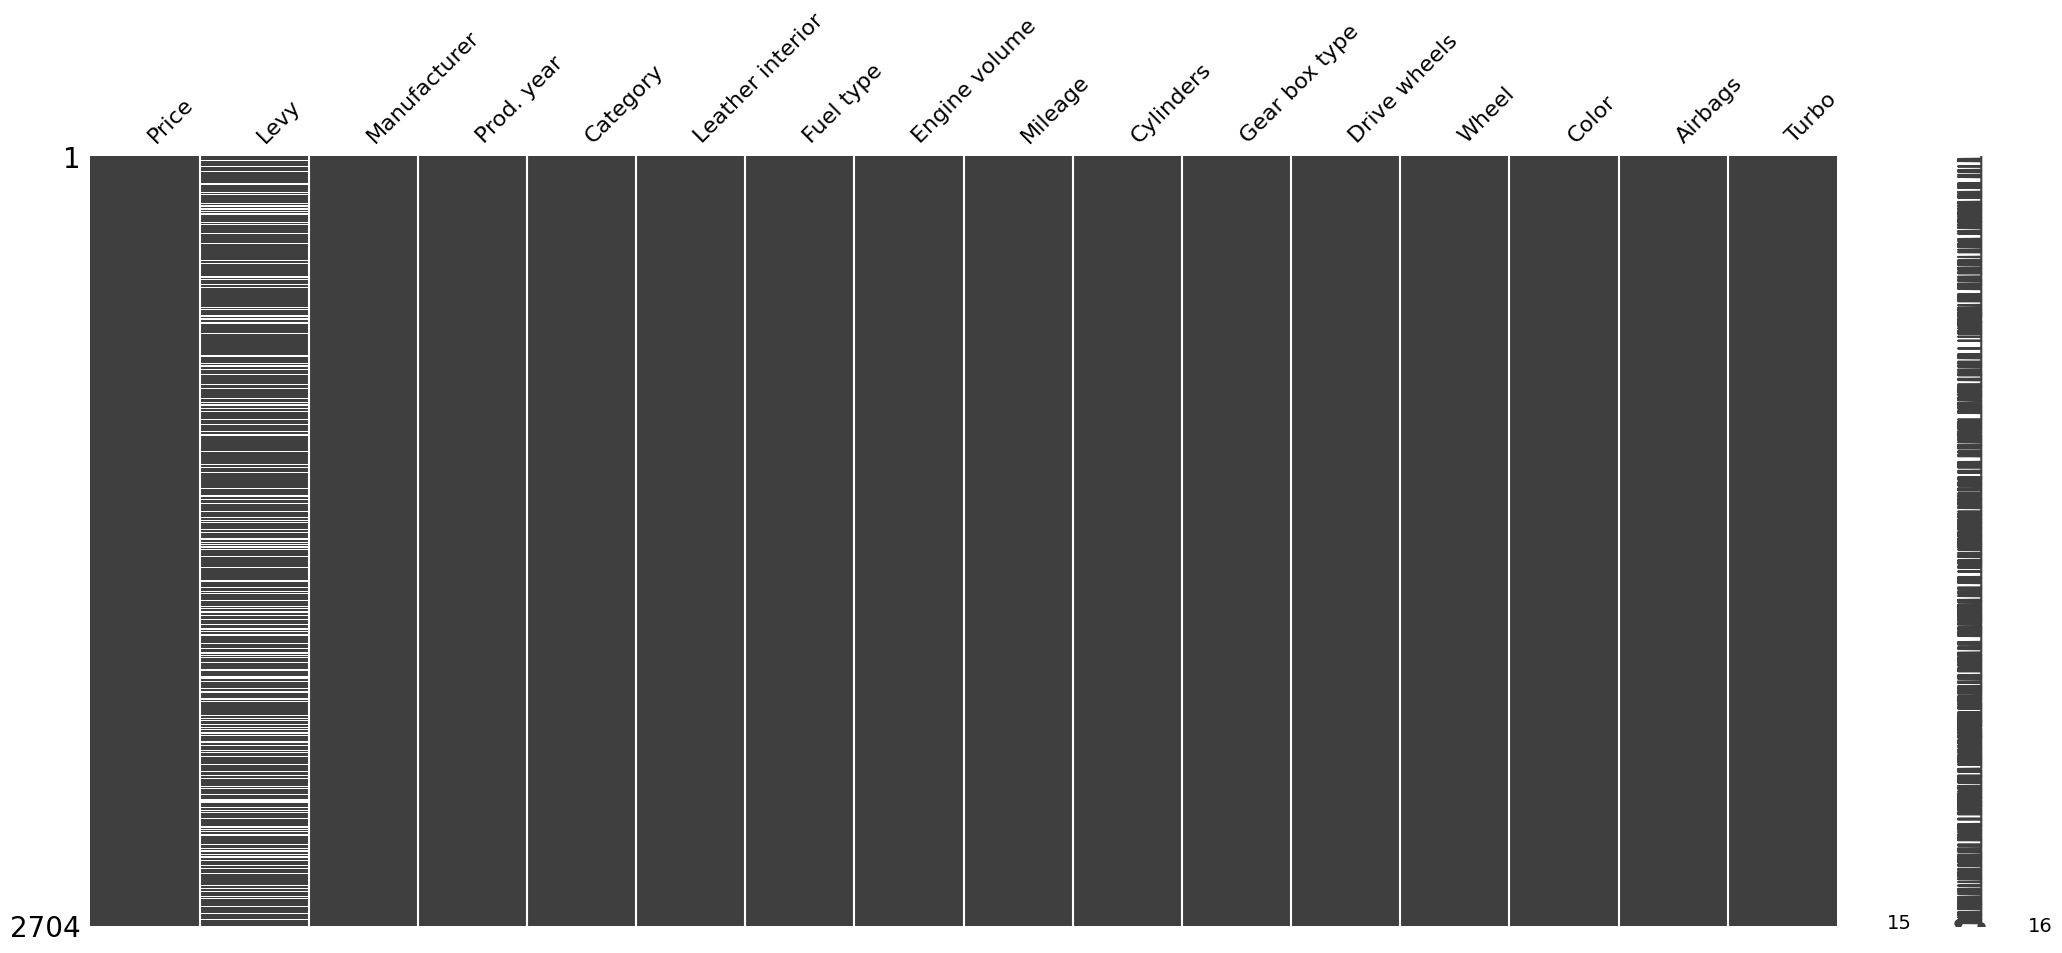

In [ ]:
import missingno as msno

# Análisis de valores nulos
print("\n" + "="*80)
print("ANÁLISIS DE VALORES FALTANTES")
print("="*80)
missing_data = df_filtrado.isnull().sum().sort_values(ascending=False)
print(missing_data)


msno.matrix(df_filtrado)

In [ ]:
cat_cols = df_filtrado.select_dtypes(include=['object', 'category']).columns
print("\nValores faltantes en columnas categóricas:")
print(df_filtrado[cat_cols].isna().sum())


Valores faltantes en columnas categóricas:
Manufacturer        0
Category            0
Leather interior    0
Fuel type           0
Gear box type       0
Drive wheels        0
Color               0
dtype: int64


In [ ]:
num_cols = df_filtrado.select_dtypes(include=['number']).columns
print("\nValores faltantes en columnas numéricas:")
print(df_filtrado[num_cols].isna().sum())


Valores faltantes en columnas numéricas:
Price              0
Levy             593
Prod. year         0
Engine volume      0
Mileage            0
Cylinders          0
Airbags            0
Turbo              0
dtype: int64


In [ ]:
print("Tipos de datos:")
print(df_filtrado[num_vars].dtypes)

print("\nValores especiales:")
print(df_filtrado[num_vars].apply(lambda x: x.unique()))

Tipos de datos:
Price              int64
Levy             float64
Prod. year         int64
Engine volume    float64
Mileage            int64
Cylinders          int64
Airbags            int64
Turbo              int64
dtype: object

Valores especiales:
Price            [39493, 1803, 1098, 941, 1019, 59464, 549, 283...
Levy             [891.0, 761.0, 394.0, 1053.0, 1055.0, 1079.0, ...
Prod. year       [2016, 2010, 2014, 2013, 2018, 2008, 2017, 200...
Engine volume    [2.0, 1.8, 2.5, 3.5, 2.2, 1.5, 3.3, 2.4, 1.6, ...
Mileage          [160931, 258909, 398069, 184467, 138038, 76000...
Cylinders                               [4, 6, 8, 12, 5, 3, 7, 10]
Airbags          [4, 12, 8, 6, 0, 10, 1, 2, 9, 5, 11, 16, 7, 3,...
Turbo                                                       [0, 1]
dtype: object


Vemos que existe un elevado numero de valores nulos en la columna Levy,

Levy es una característica que como vimos previamente no presentaría un alto valor predictivo, aunque para analizar eso y correr modelos de SVM necesitamos tener valores diferentes de cero en esa característica. Decidiremos imputar luego los datos faltantes utilizando KNNImputer, y basándonos en los vecinos mas cercanos para completar la información.

## Verificamos la existencia de correlaciones entre variables:




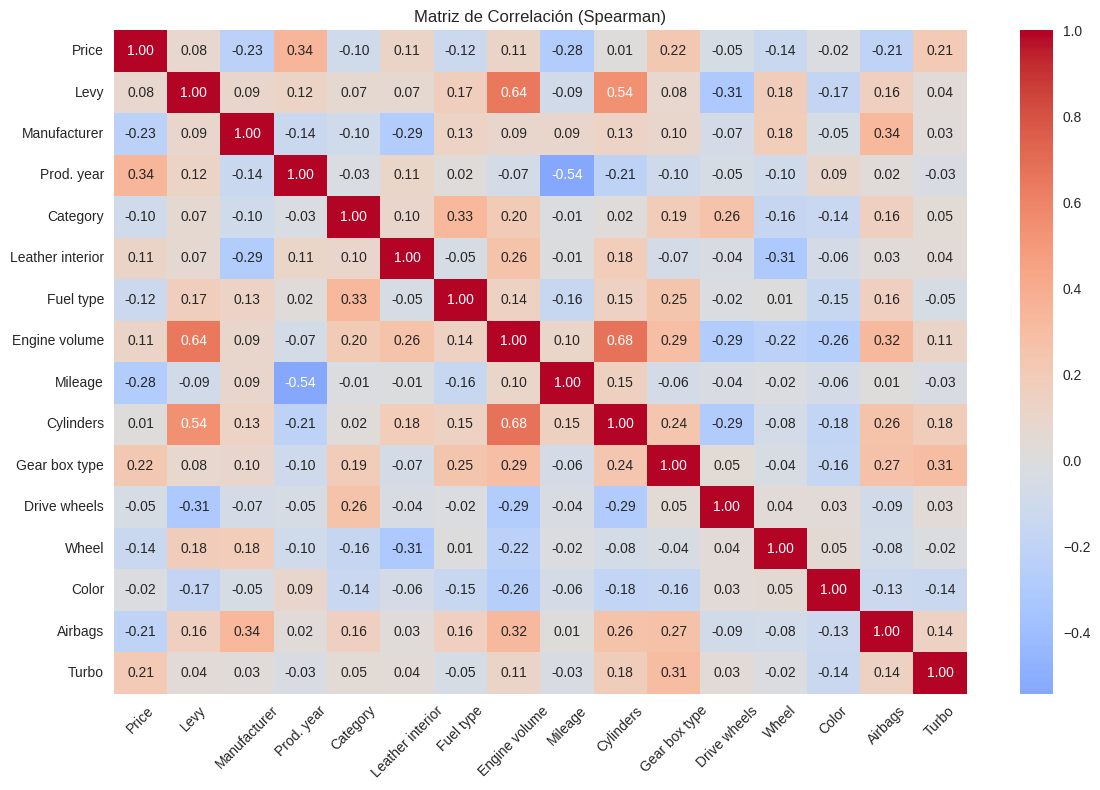


Top 10 correlaciones:
Engine volume  Cylinders        0.679107
Cylinders      Engine volume    0.679107
Engine volume  Levy             0.644979
Levy           Engine volume    0.644979
Mileage        Prod. year      -0.543143
Prod. year     Mileage         -0.543143
Levy           Cylinders        0.538260
Cylinders      Levy             0.538260
Prod. year     Price            0.344296
Price          Prod. year       0.344296
dtype: float64


In [ ]:
# 1. Codificación rápida de variables categóricas para análisis
df_encoded = df_filtrado.copy()
for col in df_filtrado.select_dtypes(include=['object', 'category']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_filtrado[col])

# 2. Matriz de correlación
plt.figure(figsize=(12, 8))
corr_matrix = df_encoded.corr(method='spearman')  # Spearman para relaciones no lineales
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Matriz de Correlación (Spearman)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Top de correlaciones (valor absoluto)
corr_pairs = corr_matrix.unstack().sort_values(key=abs, ascending=False)
unique_pairs = corr_pairs[corr_pairs.index.map(lambda x: x[0] != x[1])]
print("\nTop 10 correlaciones:")
print(unique_pairs.head(10))


Como podemos ver las correlaciones no sobrepasan el 70%, entre las variables con mayor correlacion como lo son "Engine volume" y "Cylinders", por lo que decidimos dejar todas las variables en el conjunto de datos y continuar adelante con el desarrollo del pipeline.

Con este preprocesamiento bàsico ya estamos en condiciones de realizar el resto de pasos utilizando los pipelines de scikitlearn para mantener el orden en el código.

El escalado y el encoding se haràn dentro del piepline.

## Punto 2: Obtener el mejor modelo posible con una máquina de vector soporte.


### Importamos *librerias*

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (StandardScaler, OneHotEncoder, FunctionTransformer)
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt
import seaborn as sns

### Hacemos la division del conjunto en entrenamiento y test.

In [ ]:
# 1. División de datos (asumiendo que X e y están definidos)
X = df_filtrado.drop('Color', axis=1)  # Ajusta según tu target
y = df_filtrado['Color']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # Mantiene proporción de clases
)


In [ ]:
# 2. Definición de transformaciones
print(cat_cols)
print(num_cols)

Index(['Manufacturer', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Color'],
      dtype='object')
Index(['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders',
       'Airbags', 'Turbo'],
      dtype='object')


In [ ]:
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('log_transform', FunctionTransformer(np.log1p)),  # Para manejar skewness
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Pipeline corregido
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),

    # Selección de características con número fijo de características
    ('feature_selection', SelectKBest(score_func=f_classif, k=10)),  # Fija un número en lugar de 'all'

    ('svm', SVC(
        class_weight='balanced',
        random_state=42,
        probability=True
    ))
])

# Asegúrate de que en tu GridSearchCV definas los parámetros correctamente
param_grid = {
    'feature_selection__k': [5, 10, 15, 20],  # Prueba diferentes números de características
    'svm__C': np.logspace(-3, 3, 7),
    'svm__gamma': np.logspace(-3, 3, 7),
    'svm__kernel': ['linear', 'rbf']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    svm_pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Entrenamiento
grid_search.fit(X_train, y_train)

# Evaluación corregida
best_model = grid_search.best_estimator_

# Obtener las probabilidades correctamente
try:
    y_proba = best_model.predict_proba(X_test)[:, 1]
    print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")
except Exception as e:
    print(f"Error al obtener probabilidades: {str(e)}")
    # Fallback: usar decision function si predict_proba falla
    y_scores = best_model.decision_function(X_test)
    print(f"AUC-ROC usando decision function: {roc_auc_score(y_test, y_scores):.4f}")

Fitting 5 folds for each of 392 candidates, totalling 1960 fits


In [ ]:
# 4. Búsqueda de parámetros
param_grid = [
    {
        'svm__kernel': ['linear'],
        'svm__C': np.logspace(-3, 3, 7)
    },
    {
        'svm__kernel': ['rbf'],
        'svm__C': np.logspace(-3, 3, 7),
        'svm__gamma': np.logspace(-3, 3, 7)
    }
]

# Configurar búsqueda de parámetros
grid_search = GridSearchCV(
    svm_pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)



grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('log_transform',
                                                                                          FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Price',
                                                                          'Levy',
                                                                          'Engine '
                                                                          'volume',
                                                                          'Airbags',
                                                                          'Mileage']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImpute...
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid=[{'svm__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'svm__kernel': ['linear']},
                         {'svm__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'svm__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'svm__kernel': ['rbf']}],
             scoring='accuracy', verbose=1)

In [ ]:
# 5. Entrenamiento y optimización
print("Iniciando búsqueda de hiperparámetros...")
grid_search.fit(X_train, y_train)

print("\nMejores parámetros encontrados:")
print(grid_search.best_params_)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Ver características seleccionadas
if 'univariate_selection' in best_model.named_steps:
    selected_features_mask = best_model.named_steps['univariate_selection'].get_support()
    print("Características seleccionadas en primera etapa:", sum(selected_features_mask))

if 'model_based_selection' in best_model.named_steps:
    selected_features_mask = best_model.named_steps['model_based_selection'].get_support()
    print("Características seleccionadas en segunda etapa:", sum(selected_features_mask))

Iniciando búsqueda de hiperparámetros...
Fitting 5 folds for each of 56 candidates, totalling 280 fits

Mejores parámetros encontrados:
{'svm__C': np.float64(1000.0), 'svm__gamma': np.float64(0.001), 'svm__kernel': 'rbf'}


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Métricas básicas
print("\n=== Métricas de Evaluación ===")
print(classification_report(y_test, y_pred))
print(f"\nExactitud: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")

# 2. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No White', 'White'],
            yticklabels=['No White', 'White'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# 3. Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# 4. Métricas adicionales por clase
tn, fp, fn, tp = cm.ravel()
print(f"\nSensibilidad (Recall para clase positiva): {tp/(tp+fn):.4f}")
print(f"Especificidad: {tn/(tn+fp):.4f}")
print(f"Precisión (para clase positiva): {tp/(tp+fp):.4f}")




=== Métricas de Evaluación ===
              precision    recall  f1-score   support

       Black       0.65      0.62      0.64       416
       White       0.62      0.66      0.64       398

    accuracy                           0.64       814
   macro avg       0.64      0.64      0.64       814
weighted avg       0.64      0.64      0.64       814


Exactitud: 0.6388


NameError: name 'y_proba' is not defined

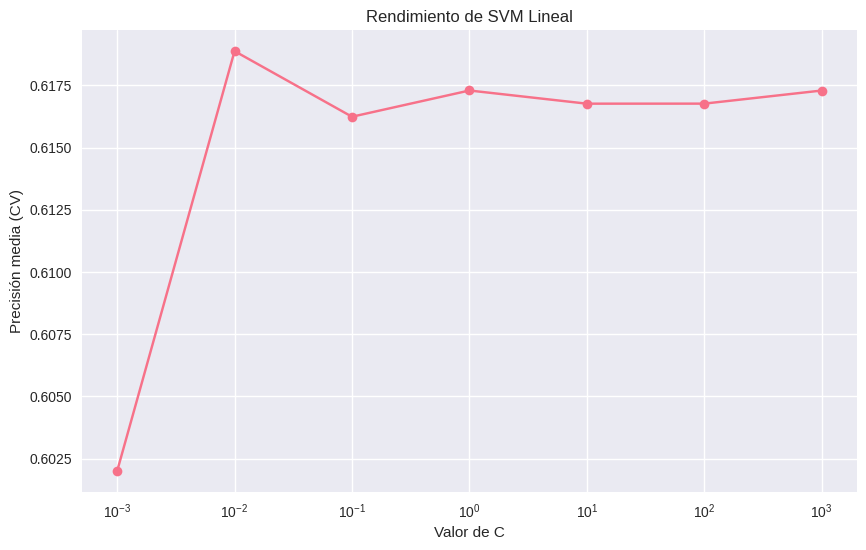

ValueError: math domain error

<Figure size 1000x800 with 2 Axes>

In [ ]:
# 7. Visualización de resultados
results = pd.DataFrame(grid_search.cv_results_)

# Gráfico para modelos lineales
linear_results = results[results['param_svm__kernel'] == 'linear']
plt.figure(figsize=(10, 6))
plt.plot(linear_results['param_svm__C'], linear_results['mean_test_score'], 'o-')
plt.xscale('log')
plt.xlabel('Valor de C')
plt.ylabel('Precisión media (CV)')
plt.title('Rendimiento de SVM Lineal')
plt.grid(True)
plt.show()

# Gráfico para modelos RBF
rbf_results = results[results['param_svm__kernel'] == 'rbf']
pivot_table = rbf_results.pivot_table(values='mean_test_score',
                                     index='param_svm__C',
                                     columns='param_svm__gamma')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap='viridis')
plt.xscale('log')
plt.yscale('log')
plt.title('Rendimiento de SVM RBF')
plt.show()



In [ ]:
# 8. Bagging con el mejor modelo (opcional)
if grid_search.best_params_['svm__kernel'] == 'rbf':
    # Crear un pipeline similar pero sin GridSearch para Bagging
    final_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('bagging', BaggingClassifier(
            base_estimator=SVC(
                kernel='rbf',
                C=grid_search.best_params_['svm__C'],
                gamma=grid_search.best_params_['svm__gamma'],
                class_weight='balanced',
                random_state=42
            ),
            n_estimators=50,
            random_state=42,
            n_jobs=-1
        ))
    ])
else:
    final_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('bagging', BaggingClassifier(
            base_estimator=SVC(
                kernel='linear',
                C=grid_search.best_params_['svm__C'],
                class_weight='balanced',
                random_state=42
            ),
            n_estimators=50,
            random_state=42,
            n_jobs=-1
        ))
    ])

final_pipeline.fit(X_train, y_train)
y_pred_bagging = final_pipeline.predict(X_test)

print("\nResultados con Bagging:")
print(classification_report(y_test, y_pred_bagging))
print("Precisión con Bagging:", accuracy_score(y_test, y_pred_bagging))

TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

### Visualizamos las variables categoricas.

In [ ]:
df_encoded.drop("Wheel_Right-hand drive", axis=1, inplace=True)


In [ ]:
df_encoded

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Engine volume,Mileage,Cylinders,Airbags,Fuel type_Hybrid,Fuel type_Petrol,Gear box type_Tiptronic,Drive wheels_Front,Drive wheels_Rear,Color_White
0,39493,891.0,0,2016,1,1,2.0,160931,4,4,False,False,False,True,False,True
1,1803,761.0,3,2010,0,1,1.8,258909,4,12,True,False,False,True,False,True
3,941,1053.0,2,2014,2,1,3.5,184467,6,12,False,False,False,False,True,True
4,1019,1055.0,1,2013,1,1,3.5,138038,6,12,True,False,False,True,False,True
5,59464,891.0,0,2016,1,1,2.0,76000,4,4,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4332,22197,503.0,3,2012,0,1,1.5,50000,4,4,False,True,False,True,False,False
4334,1176,986.0,3,2010,2,1,2.4,129170,4,12,True,False,False,True,False,False
4335,470,831.0,0,2017,2,1,1.6,25635,4,12,False,True,False,True,False,False
4336,26017,1624.0,1,2009,2,1,3.5,132700,4,4,False,True,False,True,False,True


### Visualizamos la distribucion de las variables numericas:

In [ ]:
# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Seleccionar variables numéricas (excluyendo 'Color_White' si es numérica)
numeric_vars = df_encoded.select_dtypes(include=['int64', 'float64']).columns
if 'Color_White' in numeric_vars:
    numeric_vars = numeric_vars.drop('Color_White')

# Crear gráficos combinados con hue
plt.figure(figsize=(18, len(numeric_vars)*4))

for i, var in enumerate(numeric_vars, 1):
    # Gráfico de distribución con hue
    plt.subplot(len(numeric_vars), 2, 2*i-1)
    sns.histplot(data=df_encoded,
                 x=var,
                 hue='Color_White',
                 kde=True,
                 bins=30,
                 palette={0: 'salmon', 1: 'lightblue'},
                 alpha=0.6,
                 element='step')  # Mejor visualización de distribuciones superpuestas
    plt.title(f'Distribución de {var} por Color_White', fontsize=12)
    plt.xlabel('')
    plt.legend(title='Color_White', labels=['No White', 'White'])

    # Boxplot corregido con hue
    plt.subplot(len(numeric_vars), 2, 2*i)
    sns.boxplot(data=df_encoded,
                x=var,
                hue='Color_White',  # Usamos hue en lugar de y para boxplot vertical
                palette={0: 'salmon', 1: 'lightblue'},
                width=0.5)
    plt.title(f'Boxplot de {var} por Color_White', fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
    # Mover la leyenda fuera del gráfico
    plt.legend(title='Color_White', labels=['No White', 'White'],
               bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.suptitle('Análisis de Variables Numéricas por Color_White', y=1.02, fontsize=16)
plt.show()

NameError: name 'df_encoded' is not defined

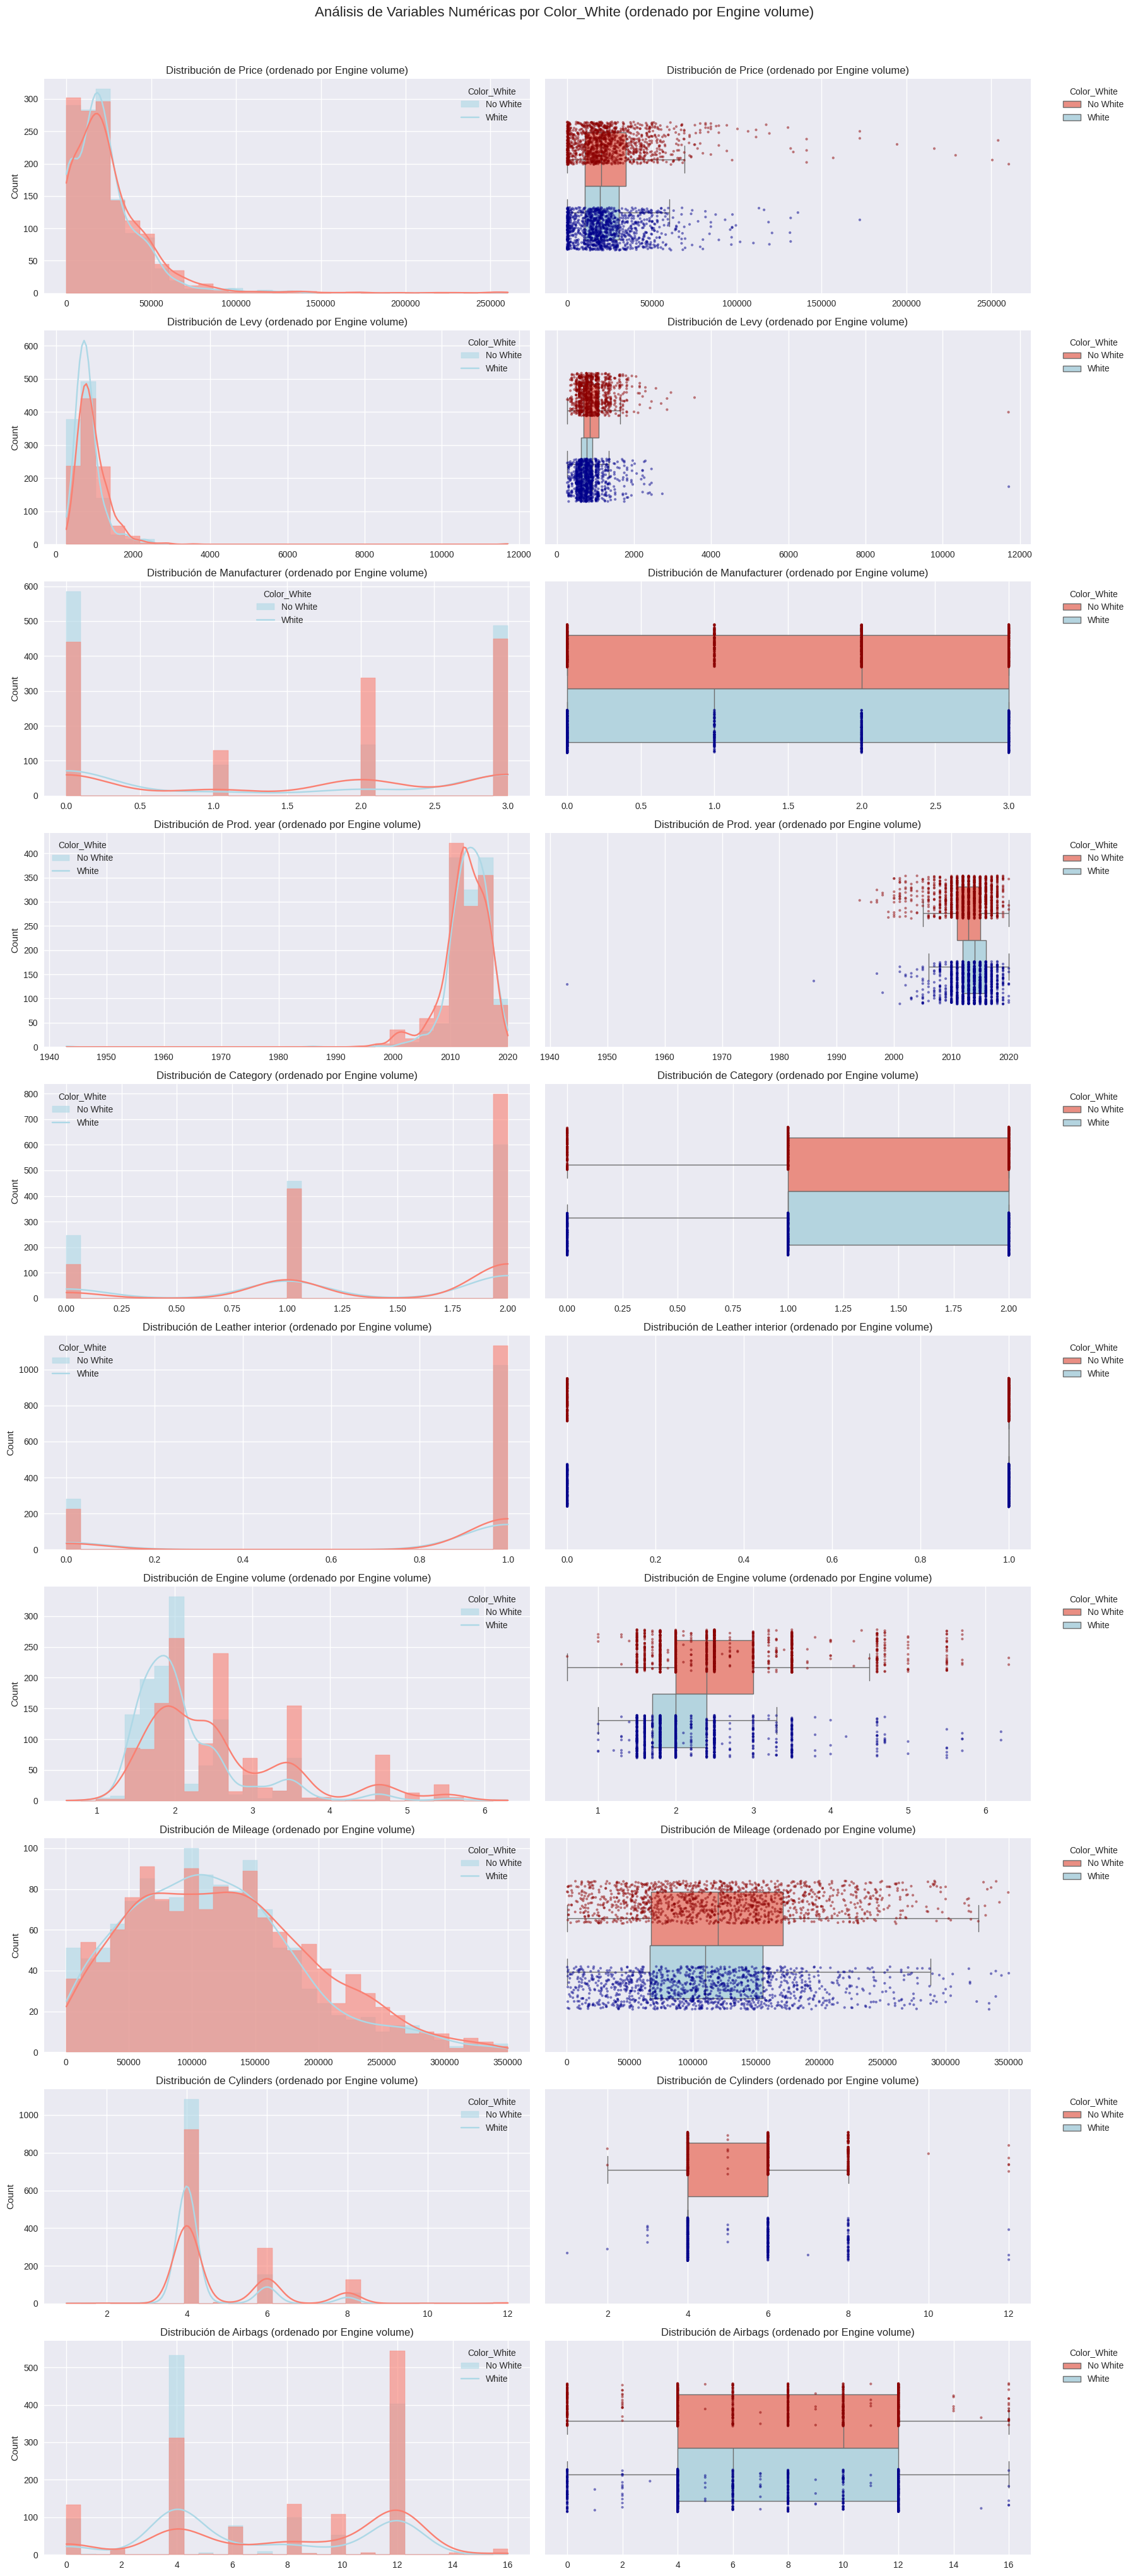

In [ ]:
# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Ordenar el DataFrame por 'Engine volume' antes de visualizar
df_sorted = df_encoded.sort_values('Engine volume')

# Seleccionar variables numéricas (excluyendo 'Color_White' si es numérica)
numeric_vars = df_sorted.select_dtypes(include=['int64', 'float64']).columns
if 'Color_White' in numeric_vars:
    numeric_vars = numeric_vars.drop('Color_White')

# Crear gráficos combinados con hue
plt.figure(figsize=(18, len(numeric_vars)*4))

for i, var in enumerate(numeric_vars, 1):
    # Gráfico de distribución con hue (ordenado)
    plt.subplot(len(numeric_vars), 2, 2*i-1)
    sns.histplot(data=df_sorted,
                 x=var,
                 hue='Color_White',
                 kde=True,
                 bins=30,
                 palette={0: 'salmon', 1: 'lightblue'},
                 alpha=0.6,
                 element='step')
    plt.title(f'Distribución de {var} (ordenado por Engine volume)', fontsize=12)
    plt.xlabel('')
    plt.legend(title='Color_White', labels=['No White', 'White'])

    # Boxplot ordenado (usaremos swarmplot para mejor visualización del orden)
    plt.subplot(len(numeric_vars), 2, 2*i)

    # Primero el boxplot
    sns.boxplot(data=df_sorted,
                x=var,
                hue='Color_White',
                palette={0: 'salmon', 1: 'lightblue'},
                width=0.5,
                showfliers=False)  # Omitimos outliers para mejor visualización

    # Luego puntos ordenados para ver la secuencia
    sns.stripplot(data=df_sorted,
                  x=var,
                  hue='Color_White',
                  palette={0: 'darkred', 1: 'darkblue'},
                  alpha=0.5,
                  jitter=0.2,
                  size=3,
                  dodge=True)

    plt.title(f'Distribución de {var} (ordenado por Engine volume)', fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
    # Mover la leyenda fuera del gráfico
    plt.legend(title='Color_White', labels=['No White', 'White'],
               bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.suptitle('Análisis de Variables Numéricas por Color_White (ordenado por Engine volume)',
             y=1.02, fontsize=16)
plt.show()


Finalmente, para implementar una solución completa de preprocesamiento y modelado, se recomienda construir un pipeline de datos que incluya imputación de valores, escalado de variables numéricas, codificación de categóricas, y opcionalmente reducción de dimensionalidad si hay un número elevado de categorías. En el caso del SVM, es importante usar class_weight='balanced' si se detecta un desbalance de clases y experimentar con distintos kernels como linear, rbf o poly dependiendo del tamaño del dataset. Para optimizar el rendimiento, se sugiere realizar una búsqueda de hiperparámetros mediante GridSearchCV, y en escenarios con alta dimensionalidad categórica aplicar técnicas como TruncatedSVD para reducir el espacio de características antes del ajuste final del modelo.

calcular importancia relativa de la der

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Calcular importancia predictiva
mi_score = mutual_info_classif(
    df_encoded[['Mileage']],
    df_encoded['Color_White'],
    random_state=42
)[0]

print(f"Importancia predictiva de la derivada: {mi_score:.4f}")

Importancia predictiva de la derivada: 0.0381


Debido a que necesito imputar valores en la columna Levy me decido por utilizar KNNImputer, en incoveniente es que preciso de saber que valor de k seria el mas apropiado, es por eso que realizo una comparativa utilizando varios valores de k, para poder decidir mejor el valor.





k=3  | Accuracy: 0.6170 | F1: 0.6203 | ROC-AUC: 0.6728
k=5  | Accuracy: 0.6133 | F1: 0.6171 | ROC-AUC: 0.6741
k=7  | Accuracy: 0.6133 | F1: 0.6171 | ROC-AUC: 0.6724
k=10 | Accuracy: 0.6108 | F1: 0.6156 | ROC-AUC: 0.6711
k=15 | Accuracy: 0.6133 | F1: 0.6161 | ROC-AUC: 0.6709
k=20 | Accuracy: 0.6133 | F1: 0.6161 | ROC-AUC: 0.6706
k=25 | Accuracy: 0.6133 | F1: 0.6161 | ROC-AUC: 0.6710
k=30 | Accuracy: 0.6120 | F1: 0.6135 | ROC-AUC: 0.6710
k=50 | Accuracy: 0.6133 | F1: 0.6152 | ROC-AUC: 0.6717


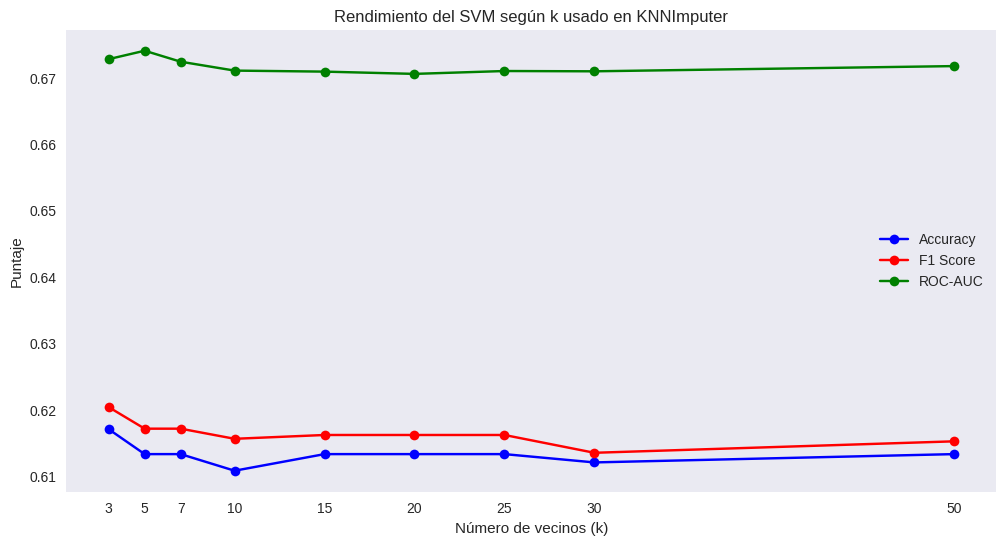

In [ ]:
# Configuración de datos
X = df_encoded.drop(columns=['Color_White'])  # Eliminamos la columna target
y = df_encoded['Color_White']  # Usamos directamente como target binario

# Valores de k a evaluar
k_values = [3, 5, 7, 10, 15, 20, 25, 30, 50]
results = []

# División única de datos para evaluación consistente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

for k in k_values:
    # Pipeline con escalado robusto e imputación KNN
    pipeline = make_pipeline(
        RobustScaler(),
        KNNImputer(n_neighbors=k),
        SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
    )

    # Entrenamiento y predicción
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]  # Probabilidades para clase positiva

    # Cálculo de métricas
    metrics = {
        'k': k,
        'accuracy': accuracy_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba),
        'report': classification_report(y_test, y_pred, output_dict=True)
    }
    results.append(metrics)

    # Feedback de progreso
    print(f"k={k:<2} | Accuracy: {metrics['accuracy']:.4f} | F1: {metrics['f1']:.4f} | ROC-AUC: {metrics['roc_auc']:.4f}")

# Análisis de resultados
results_df = pd.DataFrame(results)
best_k = results_df.loc[results_df['f1'].idxmax(), 'k']

# Visualización
plt.figure(figsize=(12, 6))
plt.plot(results_df['k'], results_df['accuracy'], 'bo-', label='Accuracy')
plt.plot(results_df['k'], results_df['f1'], 'ro-', label='F1 Score')
plt.plot(results_df['k'], results_df['roc_auc'], 'go-', label='ROC-AUC')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Puntaje')
plt.title('Rendimiento del SVM según k usado en KNNImputer')
plt.legend()
plt.grid()
plt.xticks(k_values)
plt.show()

Vemos que un buen valor para realizar la imputacion utilizando KNN puede ser elegir un valor k=7, ya que mantiene un compromiso entre el valor del accuracy, el F1 y el valor AUC Roc.
Aunque antes de la seleccion final del valor realizamos una busqueda con mas detalle en el entorno de los valores de k=7.

La busqueda arroja que es insignificante la diferencia entre los valores circundantes. Pero como nos tenemos que decantar por un valor estableceremos el valor de k=19 para realizar la imputacion de missings antes de comenzar de lleno con el modelo svm y probar los diferentes kernels y diversas configuraciones de hiperparametros.

### KNNImputer k=7

Ahora si podemos comenzar a testear la SVM con diferentes hiperparametros pra encontrrar el modelo mas adecuado.

Kernel: linear | C: 1.0  | Accuracy: 0.5985 | F1: 0.6151 | ROC-AUC: 0.6361
Kernel: linear | C: 2.0  | Accuracy: 0.5985 | F1: 0.6151 | ROC-AUC: 0.6361
Kernel: linear | C: 5.0  | Accuracy: 0.5985 | F1: 0.6151 | ROC-AUC: 0.6362
Kernel: linear | C: 10.0 | Accuracy: 0.5985 | F1: 0.6151 | ROC-AUC: 0.6361
Kernel: linear | C: 15   | Accuracy: 0.5985 | F1: 0.6151 | ROC-AUC: 0.6363
Kernel: linear | C: 20   | Accuracy: 0.5985 | F1: 0.6151 | ROC-AUC: 0.6361
Kernel: linear | C: 25   | Accuracy: 0.5985 | F1: 0.6151 | ROC-AUC: 0.6363
Kernel: linear | C: 30   | Accuracy: 0.5985 | F1: 0.6151 | ROC-AUC: 0.6363
Kernel: rbf    | C: 1.0  | Accuracy: 0.6004 | F1: 0.6034 | ROC-AUC: 0.6298
Kernel: rbf    | C: 2.0  | Accuracy: 0.6041 | F1: 0.6041 | ROC-AUC: 0.6329
Kernel: rbf    | C: 5.0  | Accuracy: 0.6116 | F1: 0.6216 | ROC-AUC: 0.6349
Kernel: rbf    | C: 10.0 | Accuracy: 0.6079 | F1: 0.6207 | ROC-AUC: 0.6318
Kernel: rbf    | C: 15   | Accuracy: 0.5947 | F1: 0.6044 | ROC-AUC: 0.6292
Kernel: rbf    | C: 20   

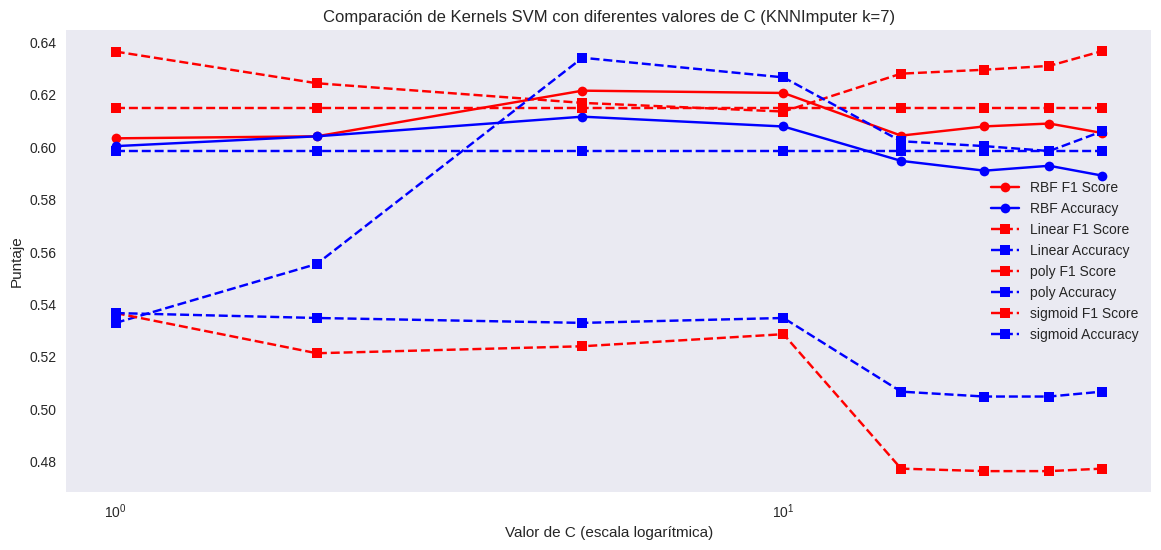


Mejor configuración encontrada:
Kernel: poly | C: 30.0
Accuracy: 0.6060 | F1: 0.6367 | ROC-AUC: 0.6288

Reporte de clasificación completo:
              precision    recall  f1-score     support
False          0.643519  0.511029  0.569672  272.000000
True           0.580442  0.704981  0.636678  261.000000
accuracy       0.606004  0.606004  0.606004    0.606004
macro avg      0.611980  0.608005  0.603175  533.000000
weighted avg   0.612631  0.606004  0.602484  533.000000

Pipeline final entrenado y listo para producción.


In [ ]:
# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Valores de C y kernels a evaluar
C_values = [1.0, 2.0, 5.0, 10.0, 15, 20, 25, 30]
kernels = ['linear', 'rbf','sigmoid', "poly"]
results = []

# Pipeline base (selector estaba sin importar)
base_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('imputer', KNNImputer(n_neighbors=19)),
    ('selector', SelectKBest(f_classif, k=10))
])

# Transformar los datos con el preprocesamiento base
X_train_transformed = base_pipeline.fit_transform(X_train, y_train)
X_test_transformed = base_pipeline.transform(X_test)

# Entrenar y evaluar modelos
for kernel in kernels:
    for C in C_values:
        svm = SVC(
            kernel=kernel,
            C=C,
            gamma='scale' if kernel == 'rbf' else 'auto',
            probability=True,
            random_state=42
        )
        svm.fit(X_train_transformed, y_train)
        y_pred = svm.predict(X_test_transformed)
        y_proba = svm.predict_proba(X_test_transformed)[:, 1]

        metrics = {
            'kernel': kernel,
            'C': C,
            'accuracy': accuracy_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred),
            'roc_auc': roc_auc_score(y_test, y_proba),
            'report': classification_report(y_test, y_pred, output_dict=True)
        }
        results.append(metrics)

        print(f"Kernel: {kernel:<6} | C: {C:<4} | Accuracy: {metrics['accuracy']:.4f} | F1: {metrics['f1']:.4f} | ROC-AUC: {metrics['roc_auc']:.4f}")

# Convertir resultados a DataFrame
results_df = pd.DataFrame(results)
best_model = results_df.loc[results_df['f1'].idxmax()]

# Visualización
plt.figure(figsize=(14, 6))

rbf_results = results_df[results_df['kernel'] == 'rbf']
plt.plot(rbf_results['C'], rbf_results['f1'], 'ro-', label='RBF F1 Score')
plt.plot(rbf_results['C'], rbf_results['accuracy'], 'bo-', label='RBF Accuracy')

linear_results = results_df[results_df['kernel'] == 'linear']
plt.plot(linear_results['C'], linear_results['f1'], 'rs--', label='Linear F1 Score')
plt.plot(linear_results['C'], linear_results['accuracy'], 'bs--', label='Linear Accuracy')

linear_results = results_df[results_df['kernel'] == 'poly']
plt.plot(linear_results['C'], linear_results['f1'], 'rs--', label='poly F1 Score')
plt.plot(linear_results['C'], linear_results['accuracy'], 'bs--', label='poly Accuracy')

linear_results = results_df[results_df['kernel'] == 'sigmoid']
plt.plot(linear_results['C'], linear_results['f1'], 'rs--', label='sigmoid F1 Score')
plt.plot(linear_results['C'], linear_results['accuracy'], 'bs--', label='sigmoid Accuracy')




plt.xscale('log')
plt.xlabel('Valor de C (escala logarítmica)')
plt.ylabel('Puntaje')
plt.title('Comparación de Kernels SVM con diferentes valores de C (KNNImputer k=7)')
plt.legend()
plt.grid()
plt.show()

# Resultado final
print("\nMejor configuración encontrada:")
print(f"Kernel: {best_model['kernel']} | C: {best_model['C']}")
print(f"Accuracy: {best_model['accuracy']:.4f} | F1: {best_model['f1']:.4f} | ROC-AUC: {best_model['roc_auc']:.4f}")
print("\nReporte de clasificación completo:")
print(pd.DataFrame(best_model['report']).transpose())

# Pipeline final entrenado con el mejor modelo
final_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('imputer', KNNImputer(n_neighbors=7)),
    ('selector', SelectKBest(f_classif, k=10)),
    ('classifier', SVC(
        kernel=best_model['kernel'],
        C=best_model['C'],
        gamma='scale' if best_model['kernel'] == 'rbf' else 'auto',
        probability=True,
        random_state=42
    ))
])

final_pipeline.fit(X, y)
print("\nPipeline final entrenado y listo para producción.")


In [ ]:
# Crear nueva columna con la transformación solicitada
df_encoded['t1'] = ((df_encoded['Manufacturer'] + 1) *
                               (df_encoded['Category'] + 1) *
                               (df_encoded['Prod. year']) *
                               df_encoded['Engine volume']) / (df_encoded['Airbags'] + 1 )

# Verificar los primeros resultados
print("Muestra de la nueva columna creada:")
print(df_encoded[['Manufacturer', 'Category', 'Engine volume', 'Airbags', 't1']].head())

Muestra de la nueva columna creada:
   Manufacturer  Category  Engine volume  Airbags           t1
0             0         1            2.0        4  1612.800000
1             3         0            1.8       12  1113.230769
2             3         2            2.5       12  4647.692308
3             2         2            3.5       12  4880.076923
4             1         1            3.5       12  2167.846154


In [ ]:
df_encoded['engine_size'] = ((df_encoded['Engine volume']) *
                               (df_encoded['Cylinders']))

Visualizacion de vairables numericas:

Volvemos a plotear los valores del nuevo dataframe para chequear

Vuelvo a probar los modelos luego de la introduccion de la variable transformada.

Kernel: linear | C: 1.0  | Accuracy: 0.6270 | F1: 0.6357 | ROC-AUC: 0.6744
Kernel: linear | C: 2.0  | Accuracy: 0.6283 | F1: 0.6365 | ROC-AUC: 0.6743
Kernel: linear | C: 5.0  | Accuracy: 0.6295 | F1: 0.6381 | ROC-AUC: 0.6743
Kernel: linear | C: 10.0 | Accuracy: 0.6283 | F1: 0.6365 | ROC-AUC: 0.6744
Kernel: linear | C: 15   | Accuracy: 0.6283 | F1: 0.6356 | ROC-AUC: 0.6743
Kernel: linear | C: 20   | Accuracy: 0.6295 | F1: 0.6381 | ROC-AUC: 0.6744
Kernel: linear | C: 25   | Accuracy: 0.6283 | F1: 0.6356 | ROC-AUC: 0.6744
Kernel: linear | C: 30   | Accuracy: 0.6295 | F1: 0.6373 | ROC-AUC: 0.6744
Kernel: rbf    | C: 1.0  | Accuracy: 0.6345 | F1: 0.6188 | ROC-AUC: 0.6850
Kernel: rbf    | C: 2.0  | Accuracy: 0.6345 | F1: 0.6178 | ROC-AUC: 0.6837
Kernel: rbf    | C: 5.0  | Accuracy: 0.6283 | F1: 0.6168 | ROC-AUC: 0.6821
Kernel: rbf    | C: 10.0 | Accuracy: 0.6258 | F1: 0.6172 | ROC-AUC: 0.6748
Kernel: rbf    | C: 15   | Accuracy: 0.6295 | F1: 0.6234 | ROC-AUC: 0.6709
Kernel: rbf    | C: 20   

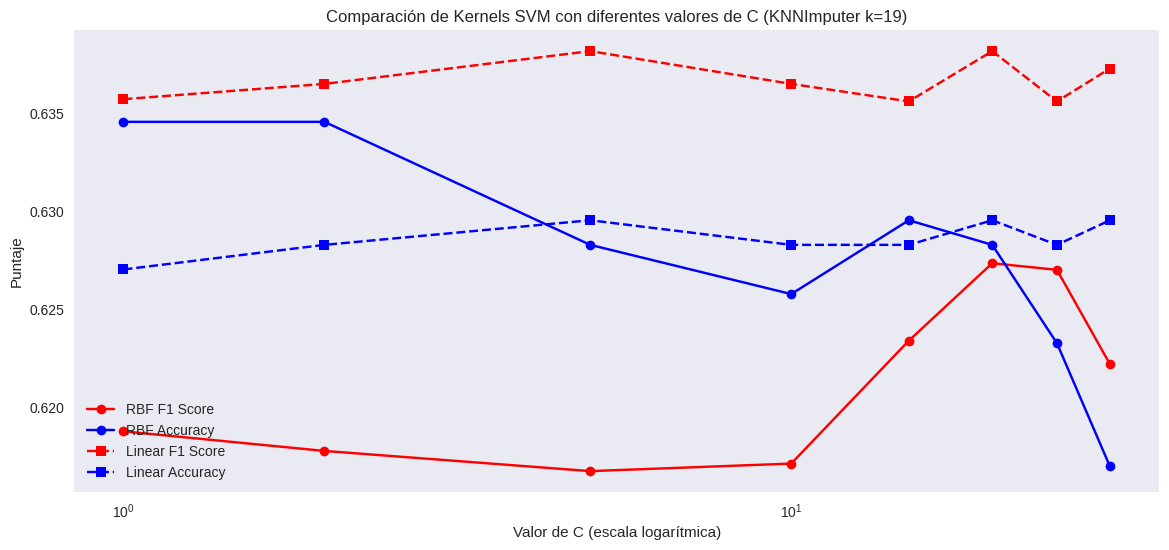


Mejor configuración encontrada:
Kernel: linear | C: 5.0
Accuracy: 0.6295 | F1: 0.6381 | ROC-AUC: 0.6743

Reporte de clasificación completo:
              precision    recall  f1-score     support
False          0.648794  0.594595  0.620513  407.000000
True           0.612676  0.665816  0.638142  392.000000
accuracy       0.629537  0.629537  0.629537    0.629537
macro avg      0.630735  0.630205  0.629327  799.000000
weighted avg   0.631074  0.629537  0.629162  799.000000

Pipeline final entrenado y listo para producción.


In [ ]:
# Configuración de datos
X = df_encoded.drop(columns=['Color_White'])  # Eliminamos la columna target
y = df_encoded['Color_White']  # Usamos directamente como target binario

# División de datos (estratificada)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99, stratify=y)

# Valores de C a evaluar para SVM
C_values = [1.0, 2.0, 5.0, 10.0, 15, 20, 25 , 30]
kernels = ['linear', 'rbf']
results = []

# Pipeline base con KNNImputer (k=19 fijo)
base_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('imputer', KNNImputer(n_neighbors=19))
])

# Aplicar preprocesamiento
X_train_preprocessed = base_pipeline.fit_transform(X_train)
X_test_preprocessed = base_pipeline.transform(X_test)

# Búsqueda de mejores parámetros para SVM
for kernel in kernels:
    for C in C_values:
        svm = SVC(
            kernel=kernel,
            C=C,
            gamma='scale' if kernel == 'rbf' else 'auto',
            probability=True,
            random_state=42
        )

        svm.fit(X_train_preprocessed, y_train)
        y_pred = svm.predict(X_test_preprocessed)
        y_proba = svm.predict_proba(X_test_preprocessed)[:, 1]

        # Cálculo de métricas
        metrics = {
            'kernel': kernel,
            'C': C,
            'accuracy': accuracy_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred),
            'roc_auc': roc_auc_score(y_test, y_proba),
            'report': classification_report(y_test, y_pred, output_dict=True)
        }
        results.append(metrics)

        # Feedback de progreso
        print(f"Kernel: {kernel:<6} | C: {C:<4} | Accuracy: {metrics['accuracy']:.4f} | F1: {metrics['f1']:.4f} | ROC-AUC: {metrics['roc_auc']:.4f}")

# Análisis de resultados
results_df = pd.DataFrame(results)
best_model = results_df.loc[results_df['f1'].idxmax()]

# Visualización de resultados
plt.figure(figsize=(14, 6))

# Gráfico para kernel rbf
rbf_results = results_df[results_df['kernel'] == 'rbf']
plt.plot(rbf_results['C'], rbf_results['f1'], 'ro-', label='RBF F1 Score')
plt.plot(rbf_results['C'], rbf_results['accuracy'], 'bo-', label='RBF Accuracy')

# Gráfico para kernel lineal
linear_results = results_df[results_df['kernel'] == 'linear']
plt.plot(linear_results['C'], linear_results['f1'], 'rs--', label='Linear F1 Score')
plt.plot(linear_results['C'], linear_results['accuracy'], 'bs--', label='Linear Accuracy')

plt.xscale('log')
plt.xlabel('Valor de C (escala logarítmica)')
plt.ylabel('Puntaje')
plt.title('Comparación de Kernels SVM con diferentes valores de C (KNNImputer k=19)')
plt.legend()
plt.grid()
plt.show()

# Resultado final
print("\nMejor configuración encontrada:")
print(f"Kernel: {best_model['kernel']} | C: {best_model['C']}")
print(f"Accuracy: {best_model['accuracy']:.4f} | F1: {best_model['f1']:.4f} | ROC-AUC: {best_model['roc_auc']:.4f}")
print("\nReporte de clasificación completo:")
print(pd.DataFrame(best_model['report']).transpose())

# Pipeline final óptimo
final_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('imputer', KNNImputer(n_neighbors=19)),
    ('classifier', SVC(
        kernel=best_model['kernel'],
        C=best_model['C'],
        gamma='scale' if best_model['kernel'] == 'rbf' else 'auto',
        probability=True,
        random_state=42
    ))
])

# Entrenamiento final con todos los datos
final_pipeline.fit(X, y)
print("\nPipeline final entrenado y listo para producción.")

In [ ]:
df_encoded.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Engine volume,Mileage,Cylinders,Airbags,Fuel type_Hybrid,Fuel type_Petrol,Gear box type_Tiptronic,Drive wheels_Front,Drive wheels_Rear,Wheel_Right-hand drive,Color_White,t1
0,39493,891.0,0,2016,1,1,2.0,160931,4,4,False,False,False,True,False,False,True,1612.800000
1,1803,761.0,3,2010,0,1,1.8,258909,4,12,True,False,False,True,False,False,True,1113.230769
3,941,1053.0,2,2014,2,1,3.5,184467,6,12,False,False,False,False,True,False,True,4880.076923
4,1019,1055.0,1,2013,1,1,3.5,138038,6,12,True,False,False,True,False,False,True,2167.846154
5,59464,891.0,0,2016,1,1,2.0,76000,4,4,False,False,False,True,False,False,True,1612.800000


K-best: 2    | Kernel: linear | C: 1.0  | Accuracy: 0.6158 | F1: 0.6531 | Features: 2
K-best: 2    | Kernel: linear | C: 2.0  | Accuracy: 0.6158 | F1: 0.6531 | Features: 2
K-best: 2    | Kernel: linear | C: 5.0  | Accuracy: 0.6158 | F1: 0.6531 | Features: 2
K-best: 2    | Kernel: linear | C: 10.0 | Accuracy: 0.6158 | F1: 0.6531 | Features: 2
K-best: 2    | Kernel: linear | C: 15   | Accuracy: 0.6158 | F1: 0.6531 | Features: 2
K-best: 2    | Kernel: linear | C: 20   | Accuracy: 0.6158 | F1: 0.6531 | Features: 2
K-best: 2    | Kernel: linear | C: 25   | Accuracy: 0.6158 | F1: 0.6531 | Features: 2
K-best: 2    | Kernel: linear | C: 30   | Accuracy: 0.6158 | F1: 0.6531 | Features: 2
K-best: 2    | Kernel: rbf    | C: 1.0  | Accuracy: 0.6158 | F1: 0.6367 | Features: 2
K-best: 2    | Kernel: rbf    | C: 2.0  | Accuracy: 0.6183 | F1: 0.6441 | Features: 2
K-best: 2    | Kernel: rbf    | C: 5.0  | Accuracy: 0.6183 | F1: 0.6441 | Features: 2
K-best: 2    | Kernel: rbf    | C: 10.0 | Accuracy: 0.

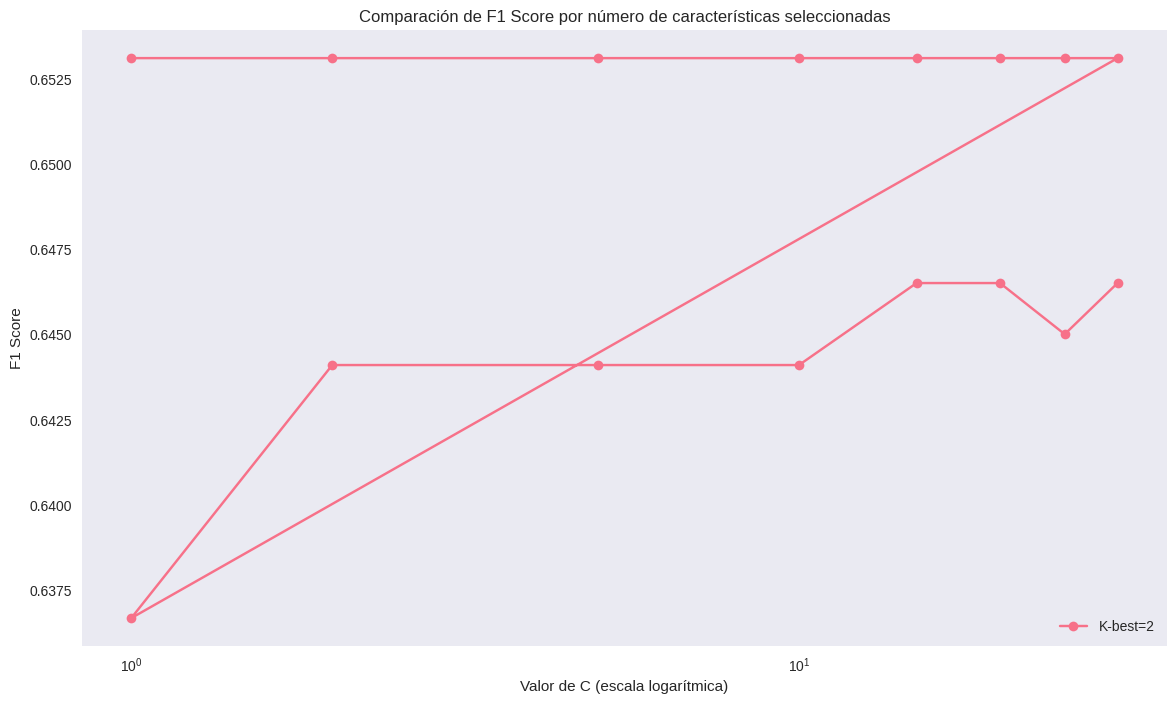


Mejor configuración encontrada:
K-best: 2 | Kernel: linear | C: 1.0
Accuracy: 0.6158 | F1: 0.6531 | ROC-AUC: 0.6483

Características seleccionadas (2):
['Engine volume', 'engine_size']

Reporte de clasificación completo:
              precision    recall  f1-score    support
False          0.663399  0.498771  0.569425  407.00000
True           0.586207  0.737245  0.653107  392.00000
accuracy       0.615770  0.615770  0.615770    0.61577
macro avg      0.624803  0.618008  0.611266  799.00000
weighted avg   0.625527  0.615770  0.610481  799.00000

Pipeline final entrenado y listo para producción.
Características finales seleccionadas: [ 6 17]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Configuración de datos
X = df_encoded.drop(columns=['Color_White'])  # Variables predictoras
y = df_encoded['Color_White']                 # Variable objetivo

# División estratificada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99, stratify=y)

# Parámetros a evaluar
C_values = [1.0, 2.0, 5.0, 10.0, 15, 20, 25, 30]
kernels = ['linear', 'rbf']
k_best_values = [2]
results = []

# Pipeline base
full_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('imputer', KNNImputer(n_neighbors=19)),
    ('selector', SelectKBest(f_classif)),
    ('classifier', SVC(probability=True, random_state=42))
])

# Búsqueda de hiperparámetros
for k_best in k_best_values:
    for kernel in kernels:
        for C in C_values:
            full_pipeline.set_params(
                selector__k=k_best,
                classifier__kernel=kernel,
                classifier__C=C,
                classifier__gamma='scale' if kernel == 'rbf' else 'auto'
            )

            # Entrenar y predecir
            full_pipeline.fit(X_train, y_train)
            y_pred = full_pipeline.predict(X_test)
            y_proba = full_pipeline.predict_proba(X_test)[:, 1]

            # Guardar métricas
            selected_features = X_train.columns[full_pipeline.named_steps['selector'].get_support()]
            metrics = {
                'k_best': k_best,
                'kernel': kernel,
                'C': C,
                'accuracy': accuracy_score(y_test, y_pred),
                'f1': f1_score(y_test, y_pred),
                'roc_auc': roc_auc_score(y_test, y_proba),
                'n_features': len(selected_features),
                'selected_features': list(selected_features),
                'report': classification_report(y_test, y_pred, output_dict=True)
            }
            results.append(metrics)

            # Feedback
            print(f"K-best: {str(k_best):<4} | Kernel: {kernel:<6} | C: {C:<4} | "
                  f"Accuracy: {metrics['accuracy']:.4f} | F1: {metrics['f1']:.4f} | "
                  f"Features: {metrics['n_features']}")

# Resultados
results_df = pd.DataFrame(results)
best_model = results_df.loc[results_df['f1'].idxmax()]

# Visualización
plt.figure(figsize=(14, 8))
for k_val in k_best_values:
    subset = results_df[results_df['k_best'] == k_val]
    plt.plot(subset['C'], subset['f1'], 'o-', label=f'K-best={k_val}')

plt.xscale('log')
plt.xlabel('Valor de C (escala logarítmica)')
plt.ylabel('F1 Score')
plt.title('Comparación de F1 Score por número de características seleccionadas')
plt.legend()
plt.grid()
plt.show()

# Mejor configuración
print("\nMejor configuración encontrada:")
print(f"K-best: {best_model['k_best']} | Kernel: {best_model['kernel']} | C: {best_model['C']}")
print(f"Accuracy: {best_model['accuracy']:.4f} | F1: {best_model['f1']:.4f} | ROC-AUC: {best_model['roc_auc']:.4f}")
print(f"\nCaracterísticas seleccionadas ({best_model['n_features']}):")
print(best_model['selected_features'])
print("\nReporte de clasificación completo:")
print(pd.DataFrame(best_model['report']).transpose())

# Pipeline final entrenado con toda la data
final_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('imputer', KNNImputer(n_neighbors=19)),
    ('selector', SelectKBest(f_classif, k=best_model['k_best'])),
    ('classifier', SVC(
        kernel=best_model['kernel'],
        C=best_model['C'],
        gamma='scale' if best_model['kernel'] == 'rbf' else 'auto',
        probability=True,
        random_state=42
    ))
])

# Entrenamiento final
final_pipeline.fit(X, y)
print("\nPipeline final entrenado y listo para producción.")
print(f"Características finales seleccionadas: {final_pipeline.named_steps['selector'].get_support(indices=True)}")


## Analisis de distribucion de la variable objetivo (Color)


DISTRIBUCIÓN DE LA VARIABLE OBJETIVO
Color
Black    51.069322
White    48.930678
Name: proportion, dtype: float64


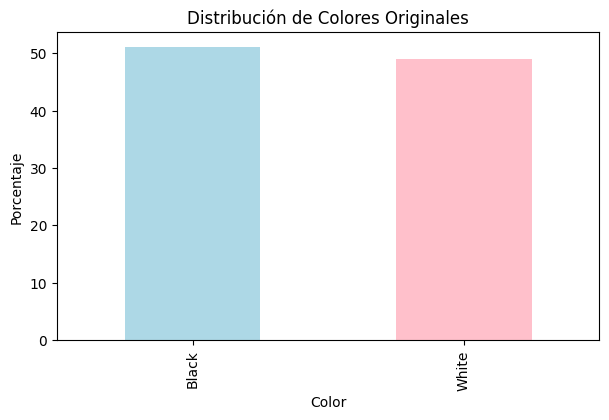

In [ ]:
# Transformación de la variable objetivo
df['Color_binario'] = df['Color'].apply(lambda x: 1 if x == 'Blanco' else 0)

# Análisis de distribución
print("\n" + "="*80)
print("DISTRIBUCIÓN DE LA VARIABLE OBJETIVO")
print("="*80)
color_dist = df['Color'].value_counts(normalize=True)*100
print(color_dist)

# Visualización
plt.figure(figsize=(7,4))
color_dist.plot(kind='bar', color=['lightblue','pink'])
plt.title('Distribución de Colores Originales')
plt.ylabel('Porcentaje')


plt.show()

**(Opcional)** Creamos una copia del df y eliminamos las columnas M E y Levy **(Opcional)**



In [ ]:
# Crear una copia del dataset original para no modificarlo directamente
df_small = df_processed.copy()

# Definir variables independientes X y dependiente y
X = df_small.drop('Color', axis=1)
y = df_small["Color"]



# First select top k features
selector = SelectKBest(mutual_info_classif, k=20)  # Example for classification
X_reduced = selector.fit_transform(X, y)


grid.fit(X_reduced, y)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=20 is greater than n_features=18. All the features will be returned.
  warnings.warn(


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=101, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 5, 10, 20, 50, 100],
                         'svm__kernel': ['linear', 'rbf']},
             refit='roc_auc', scoring=['accuracy', 'roc_auc'], verbose=1)

Creo una copia del dataset quitando algunas variables que decido eliminar como input,

*   List item
*   List item



In [ ]:

# Definir variables independientes X y dependiente y
X = df_processed.drop('Color', axis=1)
y = df_processed["Color"]


# Split data with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=101,
    stratify=y  # Important for imbalanced datasets
)

In [ ]:


## 2. Baseline Model Evaluation with Standardization
print("\n=== Baseline SVM Model (Linear Kernel) with Standardization ===")

# Create a pipeline that first standardizes then runs SVM
svm_pipeline = make_pipeline(
    StandardScaler(),  # Standardization step
    SVC(kernel='linear', probability=True, random_state=101)
)

base_model = svm_pipeline.fit(X_train, y_train)


=== Baseline SVM Model (Linear Kernel) with Standardization ===


In [ ]:

# Enhanced evaluation function
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    probas = model.predict_proba(X_test)[:, 1]

    print(classification_report(y_test, predictions))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.show()

    print(f"Accuracy: {accuracy_score(y_test, predictions):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, probas):.4f}")

    # Plot ROC curve
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.show()

evaluate_model(base_model, X_test, y_test)

## 3. Cross-Validation with Stratified K-Fold
print("\n=== Cross-Validation Results ===")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)
cv_scores = cross_val_score(
    base_model,
    X_train,
    y_train,
    cv=cv,
    scoring='accuracy'
)
print(f"CV Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

NameError: name 'base_model' is not defined

In [ ]:
print("\n=== Hyperparameter Tuning ===")

# Create pipeline for easier scaling during grid search
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True))
])

# Updated parameter grid with manually chosen C values
param_grid = {
    'svm__C': [0.1, 5, 10, 20, 50, 100],  # Specific non-logarithmic values for C
    'svm__kernel': ['linear', 'rbf']  # Two kernel options
}

# Improved grid search with more metrics
grid = GridSearchCV(
    pipe,
    param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=101),
    scoring=['accuracy', 'roc_auc'],
    refit='roc_auc',  # Optimize for AUC
    verbose=1,
    n_jobs=-1  # Use all available cores
)

grid.fit(X_train, y_train)



=== Hyperparameter Tuning ===
Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=101, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 5, 10, 20, 50, 100],
                         'svm__kernel': ['linear', 'rbf']},
             refit='roc_auc', scoring=['accuracy', 'roc_auc'], verbose=1)

In [ ]:
pd.DataFrame(grid.cv_results_)[['param_svm__C','param_svm__kernel','mean_test_roc_auc']]

,param_svm__C,param_svm__kernel,mean_test_roc_auc
0,0.1,linear,0.688707
1,0.1,rbf,0.728424
2,5.0,linear,0.689864
3,5.0,rbf,0.781465
4,10.0,linear,0.689859
5,10.0,rbf,0.782367
6,20.0,linear,0.689875
7,20.0,rbf,0.787140
8,50.0,linear,0.689905
9,50.0,rbf,0.788267



=== Tuning Results Visualization ===


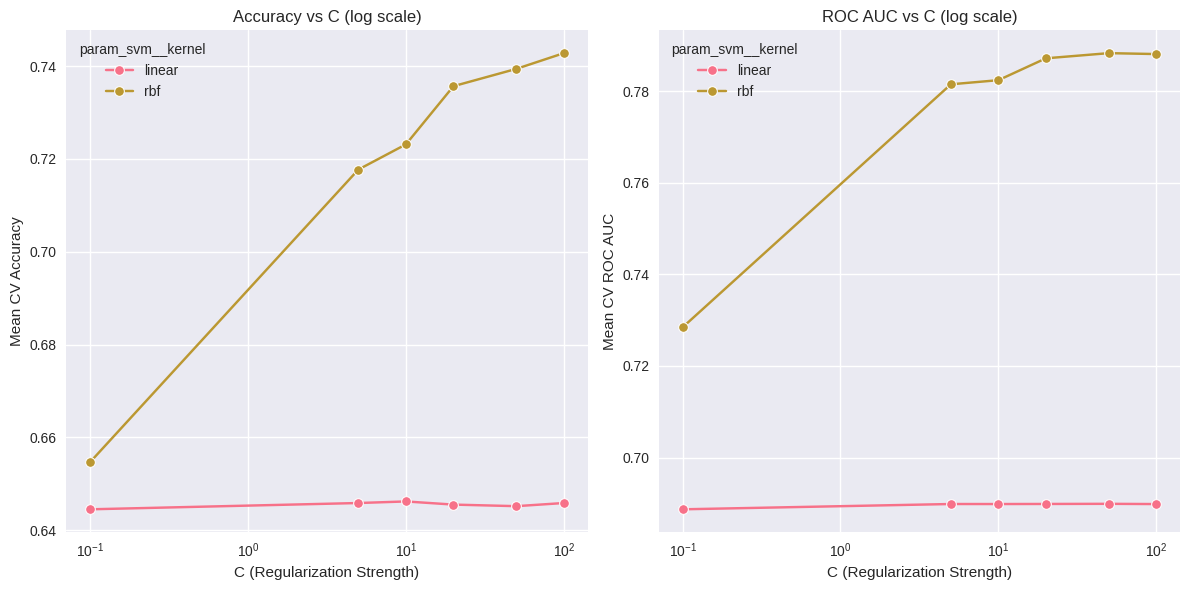

In [ ]:
## 5. Visualization of Tuning Results
print("\n=== Tuning Results Visualization ===")
results = pd.DataFrame(grid.cv_results_)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(
    data=grid.cv_results_,
    x='param_svm__C',
    y='mean_test_accuracy',
    hue='param_svm__kernel',
    marker='o'
)
plt.xscale('log')
plt.title('Accuracy vs C (log scale)')
plt.xlabel('C (Regularization Strength)')
plt.ylabel('Mean CV Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(
    data=grid.cv_results_,
    x='param_svm__C',
    y='mean_test_roc_auc',
    hue='param_svm__kernel',
    marker='o'
)
plt.xscale('log')
plt.title('ROC AUC vs C (log scale)')
plt.xlabel('C (Regularization Strength)')
plt.ylabel('Mean CV ROC AUC')

plt.tight_layout()
plt.show()



=== Best Model Evaluation ===
Best Parameters: {'svm__C': 50, 'svm__kernel': 'rbf'}
Best CV ROC AUC: 0.7883

Test Set Performance:
              precision    recall  f1-score   support

       Black       0.78      0.71      0.74       679
       White       0.69      0.77      0.73       586

    accuracy                           0.74      1265
   macro avg       0.74      0.74      0.74      1265
weighted avg       0.74      0.74      0.74      1265

Confusion Matrix:


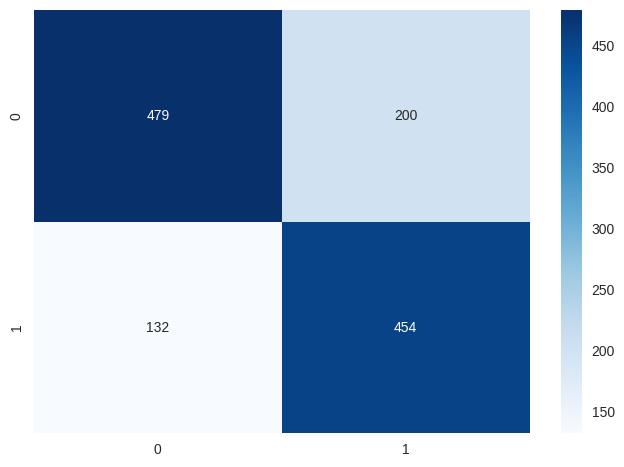

Accuracy: 0.7375
ROC AUC: 0.7790


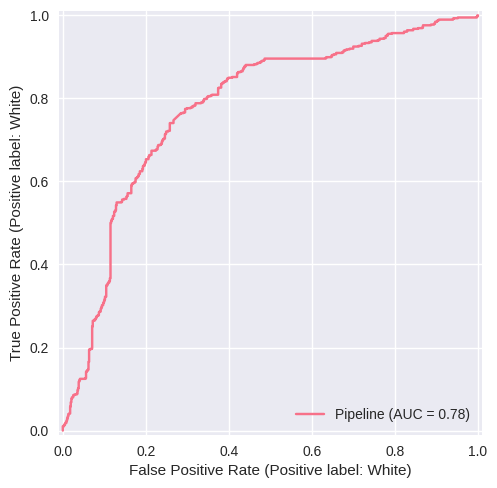


=== Exploring RBF Kernel ===
Fitting 3 folds for each of 140 candidates, totalling 420 fits

Best RBF Parameters: {'svm__C': np.float64(0.1), 'svm__class_weight': 'balanced', 'svm__gamma': np.float64(31.622776601683793), 'svm__kernel': 'rbf'}
Best RBF ROC AUC: 0.8399824822112567
              precision    recall  f1-score   support

       Black       0.68      0.94      0.79       679
       White       0.87      0.49      0.62       586

    accuracy                           0.73      1265
   macro avg       0.78      0.71      0.71      1265
weighted avg       0.77      0.73      0.71      1265

Confusion Matrix:


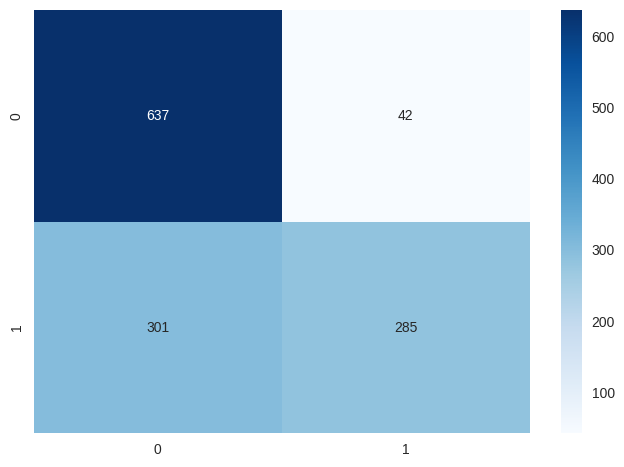

Accuracy: 0.7289
ROC AUC: 0.8584


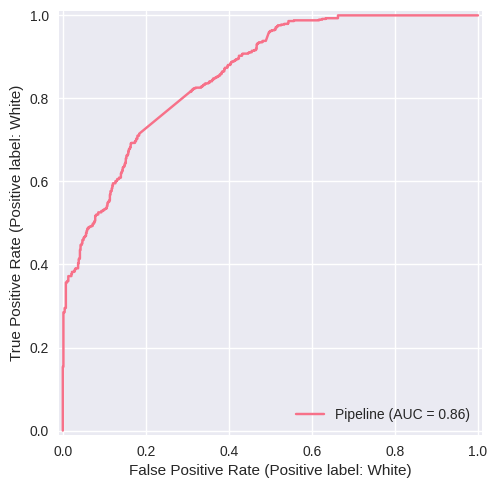

In [ ]:
## 6. Final Model Evaluation
print("\n=== Best Model Evaluation ===")
best_model = grid.best_estimator_
print(f"Best Parameters: {grid.best_params_}")
print(f"Best CV ROC AUC: {grid.best_score_:.4f}")

# Evaluate on test set
print("\nTest Set Performance:")
evaluate_model(best_model, X_test, y_test)

## 7. Additional Kernel Exploration (Optional)
print("\n=== Exploring RBF Kernel ===")

param_grid_rbf = {
    'svm__C': np.logspace(-3, 3, 10),
    'svm__gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 5)),
    'svm__kernel': ['rbf'],
    'svm__class_weight': [None, 'balanced']
}

grid_rbf = GridSearchCV(
    pipe,
    param_grid_rbf,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=101),  # Fewer splits for speed
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

grid_rbf.fit(X_train, y_train)

print("\nBest RBF Parameters:", grid_rbf.best_params_)
print("Best RBF ROC AUC:", grid_rbf.best_score_)
evaluate_model(grid_rbf.best_estimator_, X_test, y_test)

# Codigo para implementar *Bagging*

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Obtener el mejor modelo encontrado por GridSearchCV
best_model = grid.best_estimator_

# Aplicar Bagging con 10 modelos base
bagging_model = BaggingClassifier(
    base_estimator=best_model,
    n_estimators=10,  # Número de modelos en el ensamble
    max_samples=0.8,  # 80% de los datos usados en cada modelo
    max_features=1.0,  # Usar todas las features
    bootstrap=True,  # Muestreo con reemplazo
    n_jobs=-1,  # Usar todos los núcleos disponibles
    random_state=101
)

# Entrenar el modelo de Bagging
bagging_model.fit(X_train, y_train)

# Evaluar desempeño
bagging_score = bagging_model.score(X_test, y_test)
print(f"Bagging Model Accuracy: {bagging_score:.4f}")

codigo de bagging segun fuente ucm

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import BaggingClassifier

# Asumiendo que ya tienes X_train, X_test, y_train, y_test

# 1. Ajuste paramétrico con kernel lineal
param_grid_lineal = {'C': np.logspace(-3, 3, 7)}
grid_lineal = GridSearchCV(SVC(kernel='linear', random_state=42), param_grid_lineal, cv=5, scoring='accuracy')
grid_lineal.fit(X_train, y_train)

print("Mejores parámetros para kernel lineal:", grid_lineal.best_params_)
print("Mejor precisión (CV) para kernel lineal:", grid_lineal.best_score_)

# Visualización de resultados (ejemplo para C)
resultados_lineal = pd.DataFrame(grid_lineal.cv_results_)
plt.figure(figsize=(10, 6))
plt.plot(resultados_lineal['param_C'].astype(float), resultados_lineal['mean_test_score'], marker='o')
plt.xlabel('Parámetro C')
plt.ylabel('Precisión media (CV)')
plt.title('Precisión del SVM lineal vs. Parámetro C')
plt.xscale('log')
plt.grid(True)
plt.show()

# 2. Ajuste paramétrico con kernel RBF
param_grid_rbf = {'C': np.logspace(-3, 3, 7), 'gamma': np.logspace(-3, 3, 7)}
grid_rbf = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid_rbf, cv=5, scoring='accuracy')
grid_rbf.fit(X_train, y_train)

print("Mejores parámetros para kernel RBF:", grid_rbf.best_params_)
print("Mejor precisión (CV) para kernel RBF:", grid_rbf.best_score_)

# Visualización de resultados (ejemplo como heatmap)
resultados_rbf = pd.DataFrame(grid_rbf.cv_results_)
pivot_rbf = resultados_rbf.pivot_table(values='mean_test_score', index='param_C', columns='param_gamma')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_rbf, annot=True, cmap='viridis')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Precisión del SVM RBF vs. C y Gamma')
plt.xscale('log')
plt.yscale('log')
plt.show()

# 3. Comparación de los mejores modelos
mejor_modelo_lineal = grid_lineal.best_estimator_
mejor_modelo_rbf = grid_rbf.best_estimator_

predicciones_lineal = mejor_modelo_lineal.predict(X_test)
predicciones_rbf = mejor_modelo_rbf.predict(X_test)

print("\nResultados del mejor modelo lineal en el conjunto de prueba:")
print(classification_report(y_test, predicciones_lineal))
print("Precisión:", accuracy_score(y_test, predicciones_lineal))

print("\nResultados del mejor modelo RBF en el conjunto de prueba:")
print(classification_report(y_test, predicciones_rbf))
print("Precisión:", accuracy_score(y_test, predicciones_rbf))

# 4. Implementación de Bagging con el mejor modelo (ejemplo con el RBF)
bagging_svm = BaggingClassifier(base_estimator=mejor_modelo_rbf, n_estimators=50, random_state=42)
bagging_svm.fit(X_train, y_train)
predicciones_bagging = bagging_svm.predict(X_test)

print("\nResultados de Bagging sobre el mejor modelo RBF en el conjunto de prueba:")
print(classification_report(y_test, predicciones_bagging))
print("Precisión:", accuracy_score(y_test, predicciones_bagging))



# Punto 3: Stacking en profundidad.

El stacking es una técnica de ensamblaje que combina las predicciones de múltiples modelos base (también llamados clasificadores de primer nivel o base learners) para formar un nuevo conjunto de predicciones. Estas nuevas predicciones se utilizan como entrada para un meta-clasificador (también llamado clasificador de segundo nivel o final estimator), que aprende a ponderar las predicciones de los modelos base para hacer la predicción final [Ver "11_stacking_AUTOMATICO.pdf", "12_stacking_MANUAL.pdf", "14_stacking_CV_v4.pdf"].
A continuación, se describen los pasos para realizar un modelo de stacking en profundidad, comparando los clasificadores base y el resultado final:
Pasos a seguir:
Dividir los datos: Es fundamental dividir los datos en conjuntos de entrenamiento y prueba. Para un stacking más "en profundidad", a menudo se utiliza un conjunto de validación adicional para entrenar el meta-clasificador, aunque los documentos también muestran el uso de validación cruzada (cv) dentro de StackingClassifier. El documento "12_stacking_MANUAL.pdf" explícitamente menciona la división en entrenamiento, validación y prueba.


Seleccionar los clasificadores base: Elige varios modelos de clasificación diferentes para que actúen como tus clasificadores base. Es recomendable utilizar modelos diversos para que capturen diferentes aspectos de los datos. Los documentos ejemplifican el uso de RandomForestClassifier, LogisticRegression, y KNeighborsClassifier como modelos base. El documento "12_stacking_MANUAL.pdf" utiliza LinearRegression, xgb.XGBRegressor, y RandomForestRegressor (aunque en un contexto de regresión, el principio es similar).


Entrenar los clasificadores base: Entrena cada uno de los clasificadores base utilizando el conjunto de entrenamiento. En el enfoque manual ("12_stacking_MANUAL.pdf"), los modelos iniciales se entrenan en una parte de los datos.


Obtener las predicciones de los clasificadores base:


Para el meta-clasificador (conjunto de validación o cross-validation): Cada clasificador base entrenado se utiliza para hacer predicciones sobre el conjunto de validación (si se utiliza una división explícita) o mediante validación cruzada en el conjunto de entrenamiento (cross_val_predict). Estas predicciones forman las características metaaprendidas. Cada fila de estas nuevas características meta representa una instancia del conjunto de validación/entrenamiento, y cada columna representa la predicción de un clasificador base para esa instancia.
Para el conjunto de prueba: Una vez entrenado el meta-clasificador, los clasificadores base también se utilizan para hacer predicciones sobre el conjunto de prueba. Estas predicciones se transforman utilizando el meta-clasificador entrenado para obtener la predicción final del modelo de stacking.
Entrenar el meta-clasificador: El meta-clasificador se entrena utilizando las características metaaprendidas (las predicciones de los clasificadores base) como variables de entrada y las etiquetas verdaderas del conjunto de validación (o las etiquetas correspondientes a las predicciones por validación cruzada en el entrenamiento) como la variable objetivo. En los ejemplos, se utiliza LogisticRegression como meta-clasificador, pero también se puede usar RandomForestClassifier o SVC.


Evaluar el rendimiento: Evalúa el rendimiento de cada clasificador base individualmente en el conjunto de prueba. Luego, evalúa el rendimiento del modelo de stacking completo en el conjunto de prueba, utilizando las métricas de clasificación apropiadas (accuracy, precision, recall, F1-score, classification report, matriz de confusión).


Comparar los resultados: Compara las métricas de rendimiento de los clasificadores base individuales con las del modelo de stacking. Analiza si el stacking ha mejorado el rendimiento general. También puedes comparar el rendimiento de diferentes opciones para el meta-clasificador.


Implementación con StackingClassifier (automático):


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Asumiendo que tienes X e y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar los modelos base
model_rf = RandomForestClassifier(random_state=42)
model_lr = LogisticRegression(random_state=42)
model_knn = KNeighborsClassifier()

# Definir los estimadores base para el stacking
estimators = [
    ('rf', model_rf),
    ('lr', model_lr),
    ('knn', model_knn)
]

# Inicializar el meta-clasificador
final_estimator = LogisticRegression() # Puedes probar otros clasificadores aquí

# Inicializar el modelo de stacking
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5 # Usar validación cruzada interna para obtener las predicciones para el meta-clasificador
)

# Entrenar el modelo de stacking
stacking_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_stacking = stacking_model.predict(X_test)

# Evaluar el rendimiento del modelo de stacking
print("Resultados del modelo de Stacking:")
print(classification_report(y_test, y_pred_stacking))
print("Accuracy:", accuracy_score(y_test, y_pred_stacking))

# Evaluar el rendimiento de los clasificadores base individualmente
for name, model in stacking_model.named_estimators_.items():
    model.fit(X_train, y_train) # Entrenar individualmente para la comparación
    y_pred_base = model.predict(X_test)
    print(f"\nResultados del Clasificador Base {name}:")
    print(classification_report(y_test, y_pred_base))
    print(f"Accuracy ({name}):", accuracy_score(y_test, y_pred_base))



# Punto 4: Realizar un proceso comparativo sobre los modelos obtenidos.

Tendremos en cuenta diversos puntos para la comparacion de los modelos. En primer lugar evaluaremos los rendimientos entre modelos obtenidos, luego nos enfocaremos en la complejidad, la interpretabilidad y el costo computacional para establecer una comparacion global e identificar los mejores candidatos para modelos de produccion.


### Rendimiento del Modelo:

**Métricas de Precisión:** Comparar las métricas de precisión obtenidas para el mejor modelo SVM (después del ajuste paramétrico y bagging) con las del modelo de stacking en el conjunto de prueba. Las métricas clave a considerar son accuracy, AUC (si se calculó para el SVM), precision, recall y F1-score. El modelo con métricas consistentemente más altas se consideraría superior en términos de rendimiento predictivo.

**Bagging vs. Modelo SVM Base:** Evaluar si el bagging mejoró significativamente el rendimiento del modelo SVM base (sin bagging). Esto se evidencia comparando las métricas del SVM ajustado con y sin la etapa de bagging. El objetivo del bagging es generalmente reducir el error debido a la varianza.

**tacking vs. Clasificadores Base:** Determinar si el modelo de stacking superó en rendimiento a cada uno de los clasificadores base individuales. El stacking busca combinar las fortalezas de diferentes modelos para obtener una mejor predicción.

### Complejidad del Modelo:


**Número de Estimadores:** El bagging implica entrenar múltiples instancias del mismo modelo base (el SVM). El stacking involucra entrenar múltiples modelos base diferentes, además de un meta-clasificador. En general, el stacking tiende a tener mayor complejidad en términos del número de modelos entrenados.

**Hiperparámetros:** El SVM requiere una cuidadosa selección y ajuste de hiperparámetros para cada kernel. El stacking también tiene hiperparámetros que pueden ajustarse (por ejemplo, la elección de los modelos base, el meta-clasificador y los parámetros de validación cruzada), aunque el enfoque principal suele ser la diversidad de los modelos base.

### Interpretabilidad:


**SVM:** Un SVM con kernel lineal puede ofrecer cierta interpretabilidad a través de los coeficientes de los vectores de soporte. Sin embargo, con kernels no lineales (como RBF o polinomial), la interpretabilidad se reduce significativamente. El bagging de un SVM disminuye aún más la interpretabilidad al combinar las predicciones de múltiples modelos.

**Stacking:** El stacking generalmente se considera un modelo de "caja negra" con baja interpretabilidad, especialmente cuando se utilizan múltiples modelos base diversos y un meta-clasificador complejo. Es difícil discernir la importancia relativa de las características originales en la predicción final.

A pesar de que se hayan utilizado algoritmos como árboles de decisión que son transparentes por sí solos, en el contexto de un ensamble de stacking, actúan como "sub-modelos" cuyas predicciones son luego combinadas por otro modelo. Esta capa de indirección y combinación hace que el modelo final de stacking se comporte como una "caja negra" con baja interpretabilidad en términos de la influencia directa de las características originales en la predicción final.

Es más fácil entender la importancia de las predicciones de los modelos base para el meta-clasificador, pero rastrear la importancia de una característica original a través de todo el proceso de stacking es considerablemente más difícil.

### Costo Computacional:


**Tiempo de Entrenamiento:** El ajuste paramétrico del SVM, especialmente con GridSearchCV explorando múltiples kernels y rangos de parámetros, puede ser computacionalmente intensivo. El bagging también incrementa el costo al entrenar múltiples modelos SVM. El stacking requiere entrenar varios modelos base y un meta-clasificador, lo que también puede ser costoso, especialmente si los modelos base son complejos o si se utiliza una validación cruzada exhaustiva.

**Recursos:** Considerar la memoria y el tiempo de procesamiento necesarios para entrenar y hacer predicciones con cada modelo. Los modelos con mayor complejidad tienden a requerir más recursos.